# <font color = 'orange'> 1. Introduction </font>


### 📌1.1 Importer les libraries

In [467]:
#pip install yellowbrick

In [468]:
from functions import *
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing


from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import SilhouetteVisualizer

%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Users\pouri\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mod', 'norm', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 📌1.2 Importer les DataFrame

In [469]:
pop = pd.read_csv('population de chaque pays(2017 et 2012).csv')
alim = pd.read_csv('disponibilités alimentaires.csv')
alim_anim = pd.read_csv('disponibilités alimentaires(origin animal).csv')
pib = pd.read_csv('PIB par habitant.csv')
vol = pd.read_csv('disponibilités alimentaires(volailles).csv')

# <font color = 'orange'> 2. Aperçu </font>


### 📌2.1 Population

In [470]:
pop.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,31161.376,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,52832.658,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,2914.096,X,Sources internationales sûres,NaN


In [471]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            474 non-null    object 
 1   Domaine                 474 non-null    object 
 2   Code zone (FAO)         474 non-null    int64  
 3   Zone                    474 non-null    object 
 4   Code Élément            474 non-null    int64  
 5   Élément                 474 non-null    object 
 6   Code Produit            474 non-null    int64  
 7   Produit                 474 non-null    object 
 8   Code année              474 non-null    int64  
 9   Année                   474 non-null    int64  
 10  Unité                   474 non-null    object 
 11  Valeur                  474 non-null    float64
 12  Symbole                 474 non-null    object 
 13  Description du Symbole  474 non-null    object 
 14  Note                    4 non-null      ob

In [472]:
pop.Valeur.describe()

count    4.740000e+02
mean     3.700846e+04
std      1.577439e+05
min      7.930000e-01
25%      3.834055e+02
50%      5.189297e+03
75%      2.008409e+04
max      1.452625e+06
Name: Valeur, dtype: float64

In [473]:
pop['Symbole'].unique()

array(['X', 'A'], dtype=object)

In [474]:
pop[pop['Symbole'] == 'A']

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
18,OA,Séries temporelles annuelles,151,Antilles néerlandaises (ex),511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,260.348,A,"Agrégat, peut inclure des données officielles,...",NaN
19,OA,Séries temporelles annuelles,151,Antilles néerlandaises (ex),511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,275.186,A,"Agrégat, peut inclure des données officielles,...",NaN
82,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,1415164.184,A,"Agrégat, peut inclure des données officielles,...",NaN
83,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,1452625.244,A,"Agrégat, peut inclure des données officielles,...",NaN


In [475]:
pop.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (FAO)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      470
dtype: int64

In [476]:
pop[pop['Note'] == 'UNDESA, Population Division – World Population Prospects, the 2017 Revision']

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
158,OA,Séries temporelles annuelles,85,Groenland,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,56.470,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
392,OA,Séries temporelles annuelles,94,Saint-Siège,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,0.804,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
444,OA,Séries temporelles annuelles,218,Tokélaou,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,1.167,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
445,OA,Séries temporelles annuelles,218,Tokélaou,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,1.300,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."


In [477]:
pop.Zone.unique().shape

(237,)

<AxesSubplot:>

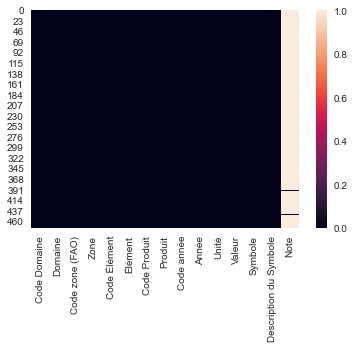

In [478]:
sns.heatmap(pop.isna())

### 📌2.2 Alimentaire


In [479]:
alim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,3080.00,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2.00,Im,Données de la FAO basées sur une méthodologie ...
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,7326.00,S,Données standardisées
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2511,Blé et produits,2017,2017,kg,158.38,Fc,Donnée calculée


In [480]:
alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99784 entries, 0 to 99783
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            99784 non-null  object 
 1   Domaine                 99784 non-null  object 
 2   Code zone (FAO)         99784 non-null  int64  
 3   Zone                    99784 non-null  object 
 4   Code Élément            99784 non-null  int64  
 5   Élément                 99784 non-null  object 
 6   Code Produit            99784 non-null  int64  
 7   Produit                 99784 non-null  object 
 8   Code année              99784 non-null  int64  
 9   Année                   99784 non-null  int64  
 10  Unité                   99784 non-null  object 
 11  Valeur                  99784 non-null  float64
 12  Symbole                 99784 non-null  object 
 13  Description du Symbole  99784 non-null  object 
dtypes: float64(1), int64(5), object(8)
mem

In [481]:
alim.nunique()

Code Domaine                 1
Domaine                      1
Code zone (FAO)            176
Zone                       176
Code Élément                 7
Élément                      7
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7446
Symbole                      4
Description du Symbole       4
dtype: int64

In [482]:
alim.Unité.unique()

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

In [483]:
alim.Symbole.unique()

array(['Im', 'S', 'Fc', 'A'], dtype=object)

In [484]:
alim["Description du Symbole"].unique()

array(["Données de la FAO basées sur une méthodologie d'imputation",
       'Données standardisées', 'Donnée calculée',
       'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées'],
      dtype=object)

In [485]:
alim[alim["Symbole"] == 'Im'].head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,3080.0,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2.0,Im,Données de la FAO basées sur une méthodologie ...
7,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2807,Riz et produits,2017,2017,Milliers de tonnes,338.0,Im,Données de la FAO basées sur une méthodologie ...
8,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2807,Riz et produits,2017,2017,Milliers de tonnes,495.0,Im,Données de la FAO basées sur une méthodologie ...


In [486]:
alim[alim["Symbole"] == 'S'].head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,7326.0,S,Données standardisées
10,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2807,Riz et produits,2017,2017,Milliers de tonnes,681.0,S,Données standardisées
17,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2513,Orge et produits,2017,2017,Milliers de tonnes,140.0,S,Données standardisées
24,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2514,Maïs et produits,2017,2017,Milliers de tonnes,213.0,S,Données standardisées
31,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2515,Seigle et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées


In [487]:
alim[alim["Symbole"] == 'Fc'].head()


,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2511,Blé et produits,2017,2017,kg,158.38,Fc,Donnée calculée
5,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé et produits,2017,2017,Kcal/personne/jour,1358.00,Fc,Donnée calculée
6,FBS,Bilans Alimentaires (2014-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2511,Blé et produits,2017,2017,g/personne/jour,36.53,Fc,Donnée calculée
11,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2807,Riz et produits,2017,2017,kg,17.80,Fc,Donnée calculée
12,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2807,Riz et produits,2017,2017,Kcal/personne/jour,123.00,Fc,Donnée calculée


In [488]:
alim[alim["Symbole"] == 'A'].head()


,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
17884,FBS,Bilans Alimentaires (2014-),351,Chine,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,134662.0,A,"Agrégat, peut inclure des données officielles,..."
17885,FBS,Bilans Alimentaires (2014-),351,Chine,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,6849.0,A,"Agrégat, peut inclure des données officielles,..."
17886,FBS,Bilans Alimentaires (2014-),351,Chine,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,774.0,A,"Agrégat, peut inclure des données officielles,..."
17887,FBS,Bilans Alimentaires (2014-),351,Chine,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,124007.0,A,"Agrégat, peut inclure des données officielles,..."
17891,FBS,Bilans Alimentaires (2014-),351,Chine,5511,Production,2807,Riz et produits,2017,2017,Milliers de tonnes,214430.0,A,"Agrégat, peut inclure des données officielles,..."


<AxesSubplot:>

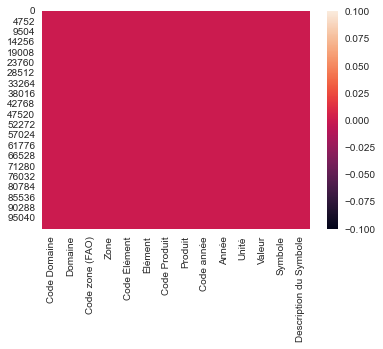

In [489]:
sns.heatmap(alim.isna())

### 📌2.3 Alimentaire(origine animale)


In [490]:
alim_anim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,195.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2017,2017,g/personne/jour,11.14,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2014-),202,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,465.00,Fc,Donnée calculée
3,FBS,Bilans Alimentaires (2014-),202,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2017,2017,g/personne/jour,35.29,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2014-),3,Albanie,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,1043.00,Fc,Donnée calculée


In [491]:
alim_anim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            346 non-null    object 
 1   Domaine                 346 non-null    object 
 2   Code zone (FAO)         346 non-null    int64  
 3   Zone                    346 non-null    object 
 4   Code Élément            346 non-null    int64  
 5   Élément                 346 non-null    object 
 6   Code Produit            346 non-null    int64  
 7   Produit                 346 non-null    object 
 8   Code année              346 non-null    int64  
 9   Année                   346 non-null    int64  
 10  Unité                   346 non-null    object 
 11  Valeur                  346 non-null    float64
 12  Symbole                 346 non-null    object 
 13  Description du Symbole  346 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory 

In [492]:
alim_anim.duplicated().any()

False

In [493]:
alim_anim.nunique()

Code Domaine                1
Domaine                     1
Code zone (FAO)           173
Zone                      173
Code Élément                2
Élément                     2
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       2
Valeur                    331
Symbole                     1
Description du Symbole      1
dtype: int64

In [494]:
alim_anim.Symbole.unique()

array(['Fc'], dtype=object)

In [495]:
alim_anim.Unité.unique()

array(['Kcal/personne/jour', 'g/personne/jour'], dtype=object)

In [496]:
alim_anim.Zone.unique().shape

(173,)

<AxesSubplot:>

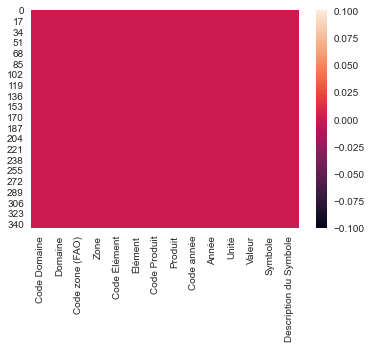

In [497]:
sns.heatmap(alim_anim.isna())

### 📌2.4 PIB (Produit Intérieur Brut)


In [498]:
pib.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,513.085978,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,3,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4514.204908,X,Sources internationales sûres,NaN
3,MK,Indicateurs macro,4,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4109.701336,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,79,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44552.061000,X,Sources internationales sûres,NaN


In [499]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            210 non-null    object 
 1   Domaine                 210 non-null    object 
 2   Code zone (FAO)         210 non-null    int64  
 3   Zone                    210 non-null    object 
 4   Code Élément            210 non-null    int64  
 5   Élément                 210 non-null    object 
 6   Code Produit            210 non-null    int64  
 7   Produit                 210 non-null    object 
 8   Code année              210 non-null    int64  
 9   Année                   210 non-null    int64  
 10  Unité                   210 non-null    object 
 11  Valeur                  210 non-null    float64
 12  Symbole                 210 non-null    object 
 13  Description du Symbole  210 non-null    object 
 14  Note                    0 non-null      fl

In [500]:
pib.nunique()

Code Domaine                1
Domaine                     1
Code zone (FAO)           210
Zone                      210
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       1
Valeur                    210
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

In [501]:
pib.isna().sum()

Code Domaine                0
Domaine                     0
Code zone (FAO)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      210
dtype: int64

### 📌2.5 Volailles 

In [502]:
vol.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,1.57,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,5.00,Fc,Donnée calculée


In [503]:
vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            1181 non-null   object 
 1   Domaine                 1181 non-null   object 
 2   Code zone (FAO)         1181 non-null   int64  
 3   Zone                    1181 non-null   object 
 4   Code Élément            1181 non-null   int64  
 5   Élément                 1181 non-null   object 
 6   Code Produit            1181 non-null   int64  
 7   Produit                 1181 non-null   object 
 8   Code année              1181 non-null   int64  
 9   Année                   1181 non-null   int64  
 10  Unité                   1181 non-null   object 
 11  Valeur                  1181 non-null   float64
 12  Symbole                 1181 non-null   object 
 13  Description du Symbole  1181 non-null   object 
dtypes: float64(1), int64(5), object(8)
memor

In [504]:
vol.nunique()

Code Domaine                1
Domaine                     1
Code zone (FAO)           174
Zone                      174
Code Élément                7
Élément                     7
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       4
Valeur                    639
Symbole                     4
Description du Symbole      4
dtype: int64

In [505]:
vol.Symbole.unique()

array(['Im', 'S', 'Fc', 'A'], dtype=object)

# <font color = 'orange'> 3. Nettoyage </font>


### 📌3.1 Population

In [506]:
#Supprimer Chine
pop_aber = pop[pop['Symbole'] == 'A'].index
pop = pop.drop(pop_aber)


In [507]:
#Changement de Unité
pop['Unité'] = 'personnes'
pop['Valeur'] = pop['Valeur'] * 1_000
pop.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2012,2012,personnes,31161376.0,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,personnes,36296113.0,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2012,2012,personnes,52832658.0,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,personnes,57009756.0,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2012,2012,personnes,2914096.0,X,Sources internationales sûres,NaN


In [508]:
#pop = pop[(pop['Valeur'] < 1_000_000_000) & (pop['Valeur'] > 500_000) ]
pop = pop[pop['Valeur'] > 500_000 ]

pop.shape

(343, 15)

<AxesSubplot:xlabel='Zone', ylabel='Valeur'>

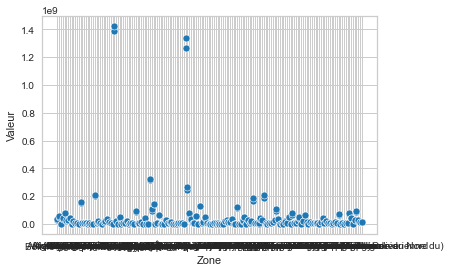

In [509]:
sns.scatterplot(x=pop.Zone, y = pop.Valeur)

### 📌3.2 Alimentaire

In [510]:
#Supprimer Chine
alim_aber = alim[alim["Zone"] == 'Chine'].index
alim = alim.drop(alim_aber)
alim[alim["Symbole"] == 'A']

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


In [511]:
alim.Zone.unique().shape

(175,)

In [512]:
alim.loc[alim['Unité'] == 'Milliers de tonnes', 'Valeur'] = alim.loc[alim['Unité'] == 'Milliers de tonnes', 'Valeur'] * 1_000
alim.loc[alim['Unité'] == 'Milliers de tonnes', 'Unité']  = 'tonnes'
alim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,tonnes,4281000.00,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,tonnes,3080000.00,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,tonnes,2000.00,Im,Données de la FAO basées sur une méthodologie ...
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,tonnes,7326000.00,S,Données standardisées
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2511,Blé et produits,2017,2017,kg,158.38,Fc,Donnée calculée


In [513]:
alim.Unité.unique()

array(['tonnes', 'kg', 'Kcal/personne/jour', 'g/personne/jour'],
      dtype=object)

### 📌3.3 Alimentaire(origine animale)


In [514]:
#Changement Unité 
alim_anim.loc[alim_anim['Unité'] == 'Milliers de tonnes', 'Valeur'] = alim_anim.loc[alim_anim['Unité'] == 'Milliers de tonnes', 'Valeur'] * 1_000
alim_anim.loc[alim_anim['Unité'] == 'Milliers de tonnes', 'Unité']  = 'tonnes'
alim_anim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,195.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2017,2017,g/personne/jour,11.14,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2014-),202,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,465.00,Fc,Donnée calculée
3,FBS,Bilans Alimentaires (2014-),202,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2017,2017,g/personne/jour,35.29,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2014-),3,Albanie,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,1043.00,Fc,Donnée calculée


In [515]:
aber_alim_anim = alim_anim[alim_anim['Zone'] == 'Chine'].index
alim_anim =alim_anim.drop(aber_alim_anim)

In [516]:
 alim_anim[alim_anim['Zone'] == 'Chine']

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


In [517]:
alim_anim.Unité.unique()

array(['Kcal/personne/jour', 'g/personne/jour'], dtype=object)

In [518]:
alim_anim.Zone.unique().shape

(172,)

### 📌3.4 Volailles 


In [519]:
#Changement Unité 
vol.loc[vol['Unité'] == 'Milliers de tonnes', 'Valeur'] = vol.loc[vol['Unité'] == 'Milliers de tonnes', 'Valeur'] * 1_000
vol.loc[vol['Unité'] == 'Milliers de tonnes', 'Unité']  = 'tonnes'
vol.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,tonnes,28000.00,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,tonnes,29000.00,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,tonnes,57000.00,S,Données standardisées
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,1.57,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,5.00,Fc,Donnée calculée


In [520]:
vol[vol["Symbole"] == 'A']


,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
212,FBS,Bilans Alimentaires (2014-),351,Chine,5511,Production,2734,Viande de Volailles,2017,2017,tonnes,20069000.0,A,"Agrégat, peut inclure des données officielles,..."
213,FBS,Bilans Alimentaires (2014-),351,Chine,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,tonnes,1543000.0,A,"Agrégat, peut inclure des données officielles,..."
214,FBS,Bilans Alimentaires (2014-),351,Chine,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,tonnes,1248000.0,A,"Agrégat, peut inclure des données officielles,..."
215,FBS,Bilans Alimentaires (2014-),351,Chine,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,tonnes,20092000.0,A,"Agrégat, peut inclure des données officielles,..."


In [521]:
#Supprimer symbol Chine
vol_aber = vol[vol["Zone"] == 'Chine'].index
vol = vol.drop(vol_aber)
vol[vol["Zone"] == 'Chine']

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


# <font color = 'orange'> 4. Transformation </font>


### 📌4.1 Population

In [522]:
#Cree les df separement
pop_2017 = pop[pop['Année'] == 2017]
pop_2012 = pop[pop['Année'] == 2012]
pop_2017.Zone.unique().shape

(172,)

In [523]:
pop_2017[pop_2017['Valeur'] < 500000]

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note


In [524]:
pop_2012[pop_2012['Valeur'] > 300000000]

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
88,OA,Séries temporelles annuelles,41,"Chine, continentale",511,Population totale,3010,Population-Estimations,2012,2012,personnes,1.384206e+09,X,Sources internationales sûres,NaN
132,OA,Séries temporelles annuelles,231,États-Unis d'Amérique,511,Population totale,3010,Population-Estimations,2012,2012,personnes,3.140439e+08,X,Sources internationales sûres,NaN
208,OA,Séries temporelles annuelles,100,Inde,511,Population totale,3010,Population-Estimations,2012,2012,personnes,1.265780e+09,X,Sources internationales sûres,NaN


In [525]:
#Jointure les 2017 et 2012
pop_var = pd.merge(pop_2017[['Zone','Unité', 'Valeur']], pop_2012[['Zone', 'Valeur']], on="Zone",how = 'inner')
#Renomer
pop_var.rename(columns = {'Valeur_x':'pop_2017', 'Valeur_y':'pop_2012','Année_x':'Année_2017', 'Année_y':'Année_2012'}, inplace= True)
pop_var.head()

,Zone,Unité,pop_2017,pop_2012
0,Afghanistan,personnes,36296113.0,31161376.0
1,Afrique du Sud,personnes,57009756.0,52832658.0
2,Albanie,personnes,2884169.0,2914096.0
3,Algérie,personnes,41389189.0,37383895.0
4,Allemagne,personnes,82658409.0,80972628.0


In [526]:
pop_var['var_pop'] = pop_var['pop_2017'] - pop_var['pop_2012']
pop_var['var_pop_%'] = (pop_var['var_pop'] / pop_var['pop_2017'] ) * 100
pop_var

,Zone,Unité,pop_2017,pop_2012,var_pop,var_pop_%
0,Afghanistan,personnes,36296113.0,31161376.0,5134737.0,14.146796
1,Afrique du Sud,personnes,57009756.0,52832658.0,4177098.0,7.326988
2,Albanie,personnes,2884169.0,2914096.0,-29927.0,-1.037630
3,Algérie,personnes,41389189.0,37383895.0,4005294.0,9.677150
4,Allemagne,personnes,82658409.0,80972628.0,1685781.0,2.039455
...,...,...,...,...,...,...
166,Venezuela (République bolivarienne du),personnes,29402484.0,29360837.0,41647.0,0.141644
167,Viet Nam,personnes,94600648.0,89801926.0,4798722.0,5.072610
168,Yémen,personnes,27834819.0,24473178.0,3361641.0,12.077107
169,Zambie,personnes,16853599.0,14465150.0,2388449.0,14.171745


<AxesSubplot:>

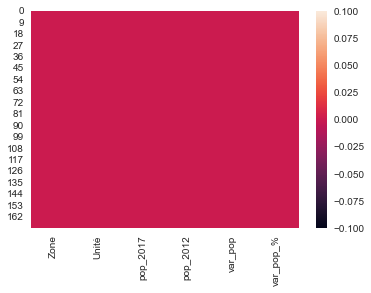

In [527]:
sns.heatmap(pop_var.isna())

### 📌4.2 Alimentaire

In [528]:
#table = pd.pivot_table(df, values='D', index=['A', 'B'],columns=['C'], aggfunc=np.sum)

alim_1 = pd.pivot_table(alim, values='Valeur', columns=['Élément'], index = ['Zone','Produit'] )
alim_1.reset_index(inplace=True)
alim_1.head()

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,Abats Comestible,5.0,1.60,0.71,61000.0,NaN,6000.0,55000.0
1,Afghanistan,"Agrumes, Autres",1.0,1.36,0.02,51000.0,0.0,33000.0,18000.0
2,Afghanistan,"Alcool, non Comestible",NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Afghanistan,Aliments pour enfants,1.0,0.06,0.03,2000.0,NaN,4000.0,NaN
4,Afghanistan,Ananas et produits,0.0,0.02,0.00,1000.0,0.0,1000.0,0.0


In [529]:
alim_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16238 entries, 0 to 16237
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      16238 non-null  object 
 1   Produit                                                   16238 non-null  object 
 2   Disponibilité alimentaire (Kcal/personne/jour)            14635 non-null  float64
 3   Disponibilité alimentaire en quantité (kg/personne/an)    14753 non-null  float64
 4   Disponibilité de protéines en quantité (g/personne/jour)  14656 non-null  float64
 5   Disponibilité intérieure                                  16238 non-null  float64
 6   Exportations - Quantité                                   12420 non-null  float64
 7   Importations - Quantité                                   15499 non-null  float64
 8   Production       

In [530]:
alim_1[np.isnan(alim_1['Production'])]

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
3,Afghanistan,Aliments pour enfants,1.0,0.06,0.03,2000.0,NaN,4000.0,NaN
8,Afghanistan,Bananes plantains,0.0,0.00,0.00,0.0,NaN,0.0,NaN
23,Afghanistan,Girofles,0.0,0.00,0.00,0.0,0.0,0.0,NaN
42,Afghanistan,Ignames,NaN,NaN,NaN,-1000.0,1000.0,NaN,NaN
46,Afghanistan,Manioc et produits,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16229,Îles Salomon,Thé,0.0,0.18,0.05,0.0,NaN,0.0,NaN
16230,Îles Salomon,Tomates et produits,0.0,0.03,0.00,0.0,NaN,0.0,NaN
16231,Îles Salomon,Viande d'Ovins/Caprins,1.0,0.08,0.03,0.0,NaN,0.0,NaN
16235,Îles Salomon,"Viande, Autre",0.0,0.01,0.00,0.0,NaN,0.0,NaN


In [531]:
alim_1 = alim_1[alim_1['Production'].notnull()]

In [532]:
alim_group =alim_1.groupby('Zone').sum()
alim_group.reset_index(inplace=True)
alim_group.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)':'kcal_hab',
                           'Disponibilité de protéines en quantité (g/personne/jour)':'kprot_hab'}, inplace=True)
alim_group



Élément,Zone,kcal_hab,Disponibilité alimentaire en quantité (kg/personne/an),kprot_hab,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,2044.0,351.08,55.54,16061000.0,626000.0,6076000.0,11568000.0
1,Afrique du Sud,2900.0,539.40,83.56,61471000.0,11039910.0,7983840.0,67779050.0
2,Albanie,3365.0,1167.96,117.77,4857070.0,164020.0,744400.0,4235700.0
3,Algérie,3320.0,751.70,91.65,43123640.0,743270.0,17731080.0,27433830.0
4,Allemagne,3483.0,820.34,103.04,173583700.0,50082670.0,60404960.0,166934410.0
...,...,...,...,...,...,...,...,...
170,Émirats arabes unis,3003.0,577.47,103.73,9182980.0,4767380.0,12504520.0,1761870.0
171,Équateur,2593.0,561.41,66.28,23403000.0,8757190.0,2078290.0,29975900.0
172,États-Unis d'Amérique,3768.0,961.03,112.88,828121650.0,195426410.0,80492780.0,947010270.0
173,Éthiopie,2332.0,356.87,66.22,53335330.0,1287890.0,2946090.0,53322130.0


In [533]:
alim_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    175 non-null    object 
 1   kcal_hab                                                175 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)  175 non-null    float64
 3   kprot_hab                                               175 non-null    float64
 4   Disponibilité intérieure                                175 non-null    float64
 5   Exportations - Quantité                                 175 non-null    float64
 6   Importations - Quantité                                 175 non-null    float64
 7   Production                                              175 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11

<AxesSubplot:xlabel='Élément'>

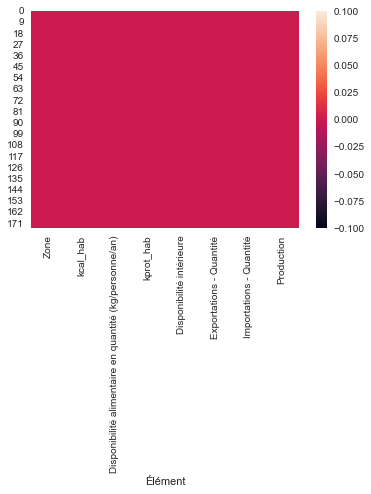

In [534]:
sns.heatmap(alim_group.isna())

### 📌4.3 Alimentaire(origine animale)


In [535]:
alim_anim_1 = pd.pivot_table(alim_anim, values='Valeur', columns=['Élément'], index = ['Zone','Produit'] )
alim_anim_1.head()

,Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,Produit,,
Afghanistan,Produits Animaux,195.0,11.14
Afrique du Sud,Produits Animaux,465.0,35.29
Albanie,Produits Animaux,1043.0,64.08
Algérie,Produits Animaux,421.0,26.71
Allemagne,Produits Animaux,1070.0,62.77


In [536]:
alim_anim_group=alim_anim_1.groupby('Zone').sum()
alim_anim_group.reset_index(inplace=True)
alim_anim_group

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,195.0,11.14
1,Afrique du Sud,465.0,35.29
2,Albanie,1043.0,64.08
3,Algérie,421.0,26.71
4,Allemagne,1070.0,62.77
...,...,...,...
167,Émirats arabes unis,704.0,51.54
168,Équateur,528.0,30.84
169,États-Unis d'Amérique,1026.0,73.30
170,Éthiopie,103.0,6.62


<AxesSubplot:xlabel='Élément'>

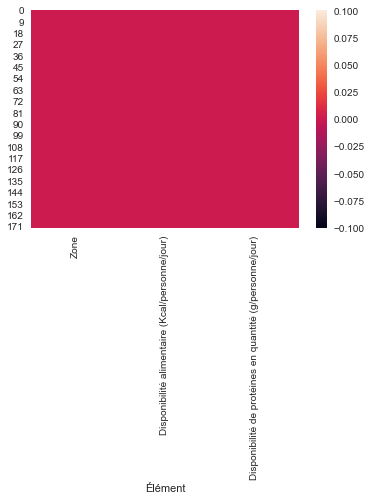

In [537]:
sns.heatmap(alim_anim_group.isna())

### 📌4.4 proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays

In [538]:
#Jointure prot total et prot anim
prot_total_anim = pd.merge(alim_group[['Zone','kprot_hab']], alim_anim_group[['Zone', 'Disponibilité de protéines en quantité (g/personne/jour)']], on="Zone",how = 'inner')
#Renemer
prot_total_anim.rename(columns = {'Disponibilité de protéines en quantité (g/personne/jour)': 'Dispo_prot_Animal'}, inplace = True)
#Colonne %
prot_total_anim['ratio_prot_anim'] = (prot_total_anim['Dispo_prot_Animal'] / prot_total_anim['kprot_hab']) * 100
prot_total_anim

Élément,Zone,kprot_hab,Dispo_prot_Animal,ratio_prot_anim
0,Afghanistan,55.54,11.14,20.057616
1,Afrique du Sud,83.56,35.29,42.233126
2,Albanie,117.77,64.08,54.411140
3,Algérie,91.65,26.71,29.143481
4,Allemagne,103.04,62.77,60.918090
...,...,...,...,...
167,Émirats arabes unis,103.73,51.54,49.686687
168,Équateur,66.28,30.84,46.529873
169,États-Unis d'Amérique,112.88,73.30,64.936215
170,Éthiopie,66.22,6.62,9.996980


<AxesSubplot:xlabel='Élément'>

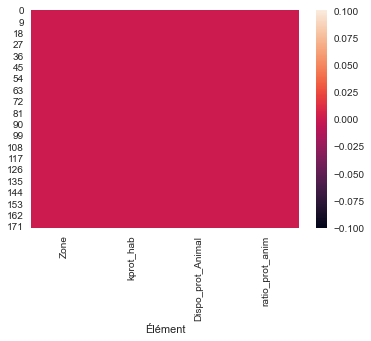

In [539]:
sns.heatmap(prot_total_anim.isna())

In [540]:
prot_total_anim[np.isnan(prot_total_anim['ratio_prot_anim'])]

Élément,Zone,kprot_hab,Dispo_prot_Animal,ratio_prot_anim


In [541]:
#prot_total_anim.replace( np.nan , 0.0 , inplace = True) 

<AxesSubplot:xlabel='Élément'>

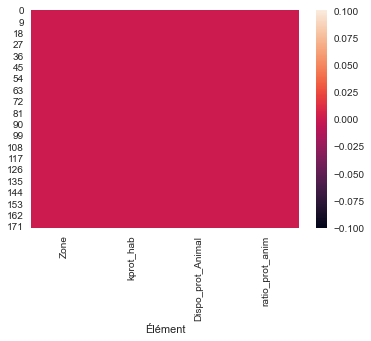

In [542]:
#Verification des NaN
sns.heatmap(prot_total_anim.isna())

### 📌4.5 Disponibilité alimentaire en protéines et disponibilité alimentaire en calories par habitant.

In [543]:
#pop_prot = pd.merge(pop_2017[['Zone', 'Valeur']], )

In [544]:
prot_total_pop = pd.merge(alim_1[['Zone','Produit','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)']], pop_2017[['Zone', 'Valeur']], on="Zone",how = 'inner')
prot_total_pop

,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Valeur
0,Afghanistan,Abats Comestible,5.0,0.71,36296113.0
1,Afghanistan,"Agrumes, Autres",1.0,0.02,36296113.0
2,Afghanistan,"Alcool, non Comestible",NaN,NaN,36296113.0
3,Afghanistan,Ananas et produits,0.0,0.00,36296113.0
4,Afghanistan,Arachides,11.0,0.49,36296113.0
...,...,...,...,...,...
10219,Îles Salomon,Riz et produits,605.0,10.59,636039.0
10220,Îles Salomon,Viande de Bovins,15.0,1.31,636039.0
10221,Îles Salomon,Viande de Volailles,19.0,1.55,636039.0
10222,Îles Salomon,Viande de porcins,43.0,1.34,636039.0


In [545]:
prot_total_pop.isnull().sum()

Zone                                                          0
Produit                                                       0
Disponibilité alimentaire (Kcal/personne/jour)              718
Disponibilité de protéines en quantité (g/personne/jour)    699
Valeur                                                        0
dtype: int64

In [546]:
#Remplacer NaN par 0.0
prot_total_pop.replace( np.nan , 0.0 , inplace = True) 

In [547]:
prot_total_pop.isna().sum()

Zone                                                        0
Produit                                                     0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
Valeur                                                      0
dtype: int64

In [548]:
prot_total_pop.groupby('Zone').sum()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Valeur
Zone,,,
Afghanistan,2044.0,55.54,2.794801e+09
Afrique du Sud,2900.0,83.56,4.503771e+09
Albanie,3365.0,117.77,1.932393e+08
Algérie,3320.0,91.65,2.855854e+09
Allemagne,3483.0,103.04,5.620772e+09
...,...,...,...
Émirats arabes unis,3003.0,103.73,4.269241e+08
Équateur,2593.0,66.28,1.561039e+09
États-Unis d'Amérique,3768.0,112.88,2.665695e+10


In [549]:
#Ajouter colonnes kprot et kcal par habitats
#prot_total_pop['kcal_hab'] = prot_total_pop['Disponibilité alimentaire (Kcal/personne/jour)'] * prot_total_pop['Valeur']
#prot_total_pop['kprot_hab'] = prot_total_pop['Disponibilité de protéines en quantité (g/personne/jour)'] * prot_total_pop['Valeur']
#prot_total_pop

In [550]:
prot_total_pop_group = prot_total_pop.groupby('Zone').sum()
prot_total_pop_group.reset_index(inplace=True)
prot_total_pop_group

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Valeur
0,Afghanistan,2044.0,55.54,2.794801e+09
1,Afrique du Sud,2900.0,83.56,4.503771e+09
2,Albanie,3365.0,117.77,1.932393e+08
3,Algérie,3320.0,91.65,2.855854e+09
4,Allemagne,3483.0,103.04,5.620772e+09
...,...,...,...,...
151,Émirats arabes unis,3003.0,103.73,4.269241e+08
152,Équateur,2593.0,66.28,1.561039e+09
153,États-Unis d'Amérique,3768.0,112.88,2.665695e+10
154,Éthiopie,2332.0,66.22,8.511994e+09


<AxesSubplot:>

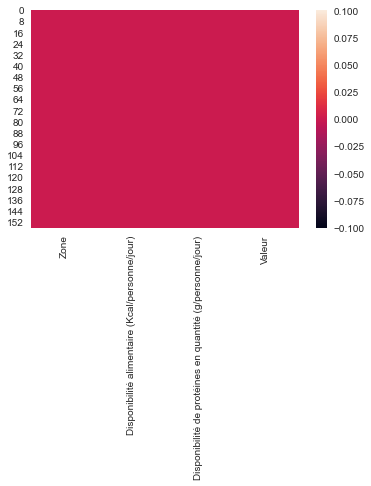

In [551]:
sns.heatmap(prot_total_pop_group.isna())

### 📌4.6 Volailles 


In [552]:
vol_1 = pd.pivot_table(vol, values='Valeur', columns=['Élément'], index = ['Zone','Produit'] )
vol_1.reset_index(inplace=True)
vol_1.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)':'disp_kcal_vol(pers)',
                      'Disponibilité de protéines en quantité (g/personne/jour)':'dispo_prot_vol(pers)',
                      'Disponibilité alimentaire en quantité (kg/personne/an)':'dispo_kg_vol(pers)',
                     'Disponibilité intérieure':'dispo_int_vol',
                     'Exportations - Quantité':'Exportations_vol',
                     'Importations - Quantité':'Importations_vol',
                     'Production':'Production_vol'}, inplace=True)
vol_1.head()

Élément,Zone,Produit,disp_kcal_vol(pers),dispo_kg_vol(pers),dispo_prot_vol(pers),dispo_int_vol,Exportations_vol,Importations_vol,Production_vol
0,Afghanistan,Viande de Volailles,5.0,1.57,0.56,57000.0,NaN,29000.0,28000.0
1,Afrique du Sud,Viande de Volailles,149.0,37.14,14.68,2116000.0,63000.0,514000.0,1665000.0
2,Albanie,Viande de Volailles,59.0,11.45,4.44,33000.0,0.0,20000.0,13000.0
3,Algérie,Viande de Volailles,25.0,7.35,2.26,304000.0,0.0,2000.0,297000.0
4,Allemagne,Viande de Volailles,67.0,18.05,7.39,1557000.0,646000.0,842000.0,1514000.0


In [553]:
vol_1.isna().sum()

Élément
Zone                     0
Produit                  0
disp_kcal_vol(pers)      0
dispo_kg_vol(pers)       0
dispo_prot_vol(pers)     0
dispo_int_vol            0
Exportations_vol        34
Importations_vol         1
Production_vol           2
dtype: int64

In [554]:
#Remplacer NaN colonne importation par 0.0
vol_1.Importations_vol = np.where(np.isnan(vol_1.Importations_vol), 0, vol_1.Importations_vol)
vol_1.Production_vol = np.where(np.isnan(vol_1.Production_vol), 0, vol_1.Production_vol)

vol_1.isna().sum()

Élément
Zone                     0
Produit                  0
disp_kcal_vol(pers)      0
dispo_kg_vol(pers)       0
dispo_prot_vol(pers)     0
dispo_int_vol            0
Exportations_vol        34
Importations_vol         0
Production_vol           0
dtype: int64

In [555]:
#Ajouter colonne le taux de dépendance aux importations
vol_1['dep_import_vol'] = (vol_1['Importations_vol'] / vol_1['dispo_int_vol']) * 100
#Ajouter colonne le taux d'autosuffisance exprime l'importance de la production
vol_1['autosuff_vol'] = (vol_1['Production_vol'] / vol_1['dispo_int_vol']) * 100

vol_1.head()

Élément,Zone,Produit,disp_kcal_vol(pers),dispo_kg_vol(pers),dispo_prot_vol(pers),dispo_int_vol,Exportations_vol,Importations_vol,Production_vol,dep_import_vol,autosuff_vol
0,Afghanistan,Viande de Volailles,5.0,1.57,0.56,57000.0,NaN,29000.0,28000.0,50.877193,49.122807
1,Afrique du Sud,Viande de Volailles,149.0,37.14,14.68,2116000.0,63000.0,514000.0,1665000.0,24.291115,78.686200
2,Albanie,Viande de Volailles,59.0,11.45,4.44,33000.0,0.0,20000.0,13000.0,60.606061,39.393939
3,Algérie,Viande de Volailles,25.0,7.35,2.26,304000.0,0.0,2000.0,297000.0,0.657895,97.697368
4,Allemagne,Viande de Volailles,67.0,18.05,7.39,1557000.0,646000.0,842000.0,1514000.0,54.078356,97.238279


### 📌4.7 Jointure DataFrame final

In [556]:
#df pop et anim
df_1 = pd.merge(alim_group[['Zone','kcal_hab','kprot_hab']],prot_total_anim[['Zone', 'ratio_prot_anim']], on='Zone', how='inner')
df_1

Élément,Zone,kcal_hab,kprot_hab,ratio_prot_anim
0,Afghanistan,2044.0,55.54,20.057616
1,Afrique du Sud,2900.0,83.56,42.233126
2,Albanie,3365.0,117.77,54.411140
3,Algérie,3320.0,91.65,29.143481
4,Allemagne,3483.0,103.04,60.918090
...,...,...,...,...
167,Émirats arabes unis,3003.0,103.73,49.686687
168,Équateur,2593.0,66.28,46.529873
169,États-Unis d'Amérique,3768.0,112.88,64.936215
170,Éthiopie,2332.0,66.22,9.996980


In [557]:
#df pop variation et df1
df_2 = pd.merge(df_1, pop_var[['Zone','pop_2017', 'var_pop_%']], on='Zone', how = 'inner')
df_2

,Zone,kcal_hab,kprot_hab,ratio_prot_anim,pop_2017,var_pop_%
0,Afghanistan,2044.0,55.54,20.057616,36296113.0,14.146796
1,Afrique du Sud,2900.0,83.56,42.233126,57009756.0,7.326988
2,Albanie,3365.0,117.77,54.411140,2884169.0,-1.037630
3,Algérie,3320.0,91.65,29.143481,41389189.0,9.677150
4,Allemagne,3483.0,103.04,60.918090,82658409.0,2.039455
...,...,...,...,...,...,...
149,Émirats arabes unis,3003.0,103.73,49.686687,9487203.0,3.642876
150,Équateur,2593.0,66.28,46.529873,16785361.0,7.811926
151,États-Unis d'Amérique,3768.0,112.88,64.936215,325084756.0,3.396305
152,Éthiopie,2332.0,66.22,9.996980,106399924.0,12.850516


In [558]:
#df2 et df PIB
df_3 = pd.merge(df_2, pib[['Zone','Valeur']], on='Zone', how='inner' )
df_3.rename(columns={'Valeur':'PIB_hab_usd'}, inplace=True)
df_3

,Zone,kcal_hab,kprot_hab,ratio_prot_anim,pop_2017,var_pop_%,PIB_hab_usd
0,Afghanistan,2044.0,55.54,20.057616,36296113.0,14.146796,513.085978
1,Afrique du Sud,2900.0,83.56,42.233126,57009756.0,7.326988,6121.876572
2,Albanie,3365.0,117.77,54.411140,2884169.0,-1.037630,4514.204908
3,Algérie,3320.0,91.65,29.143481,41389189.0,9.677150,4109.701336
4,Allemagne,3483.0,103.04,60.918090,82658409.0,2.039455,44552.061000
...,...,...,...,...,...,...,...
148,Émirats arabes unis,3003.0,103.73,49.686687,9487203.0,3.642876,40644.804043
149,Équateur,2593.0,66.28,46.529873,16785361.0,7.811926,6213.501276
150,États-Unis d'Amérique,3768.0,112.88,64.936215,325084756.0,3.396305,60116.568493
151,Éthiopie,2332.0,66.22,9.996980,106399924.0,12.850516,721.753494


In [559]:
df = pd.merge(df_3, vol_1[['Zone', 'dispo_int_vol', 'Importations_vol', 'Production_vol', 'dep_import_vol', 'autosuff_vol']], on='Zone', how = 'inner')
df

,Zone,kcal_hab,kprot_hab,ratio_prot_anim,pop_2017,var_pop_%,PIB_hab_usd,dispo_int_vol,Importations_vol,Production_vol,dep_import_vol,autosuff_vol
0,Afghanistan,2044.0,55.54,20.057616,36296113.0,14.146796,513.085978,57000.0,29000.0,28000.0,50.877193,49.122807
1,Afrique du Sud,2900.0,83.56,42.233126,57009756.0,7.326988,6121.876572,2116000.0,514000.0,1665000.0,24.291115,78.686200
2,Albanie,3365.0,117.77,54.411140,2884169.0,-1.037630,4514.204908,33000.0,20000.0,13000.0,60.606061,39.393939
3,Algérie,3320.0,91.65,29.143481,41389189.0,9.677150,4109.701336,304000.0,2000.0,297000.0,0.657895,97.697368
4,Allemagne,3483.0,103.04,60.918090,82658409.0,2.039455,44552.061000,1557000.0,842000.0,1514000.0,54.078356,97.238279
...,...,...,...,...,...,...,...,...,...,...,...,...
148,Émirats arabes unis,3003.0,103.73,49.686687,9487203.0,3.642876,40644.804043,480000.0,465000.0,47000.0,96.875000,9.791667
149,Équateur,2593.0,66.28,46.529873,16785361.0,7.811926,6213.501276,340000.0,0.0,340000.0,0.000000,100.000000
150,États-Unis d'Amérique,3768.0,112.88,64.936215,325084756.0,3.396305,60116.568493,18305000.0,123000.0,21914000.0,0.671948,119.715925
151,Éthiopie,2332.0,66.22,9.996980,106399924.0,12.850516,721.753494,72000.0,1000.0,71000.0,1.388889,98.611111


In [560]:
df_zone = df.copy()
df_zone.set_index('Zone',inplace=True)
df_zone

,kcal_hab,kprot_hab,ratio_prot_anim,pop_2017,var_pop_%,PIB_hab_usd,dispo_int_vol,Importations_vol,Production_vol,dep_import_vol,autosuff_vol
Zone,,,,,,,,,,,
Afghanistan,2044.0,55.54,20.057616,36296113.0,14.146796,513.085978,57000.0,29000.0,28000.0,50.877193,49.122807
Afrique du Sud,2900.0,83.56,42.233126,57009756.0,7.326988,6121.876572,2116000.0,514000.0,1665000.0,24.291115,78.686200
Albanie,3365.0,117.77,54.411140,2884169.0,-1.037630,4514.204908,33000.0,20000.0,13000.0,60.606061,39.393939
Algérie,3320.0,91.65,29.143481,41389189.0,9.677150,4109.701336,304000.0,2000.0,297000.0,0.657895,97.697368
Allemagne,3483.0,103.04,60.918090,82658409.0,2.039455,44552.061000,1557000.0,842000.0,1514000.0,54.078356,97.238279
...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,3003.0,103.73,49.686687,9487203.0,3.642876,40644.804043,480000.0,465000.0,47000.0,96.875000,9.791667
Équateur,2593.0,66.28,46.529873,16785361.0,7.811926,6213.501276,340000.0,0.0,340000.0,0.000000,100.000000
États-Unis d'Amérique,3768.0,112.88,64.936215,325084756.0,3.396305,60116.568493,18305000.0,123000.0,21914000.0,0.671948,119.715925


In [561]:
#df.to_csv('DataFrame_export.csv',index=False)


In [562]:
df.var()

C:\Users\pouri\AppData\Local\Temp/ipykernel_58920/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


kcal_hab            2.361880e+05
kprot_hab           4.138240e+02
ratio_prot_anim     2.700043e+02
pop_2017            2.611314e+16
var_pop_%           3.204387e+01
PIB_hab_usd         3.830610e+08
dispo_int_vol       5.450512e+12
Importations_vol    3.797110e+10
Production_vol      7.093919e+12
dep_import_vol      3.135521e+03
autosuff_vol        3.515934e+03
dtype: float64

<AxesSubplot:>

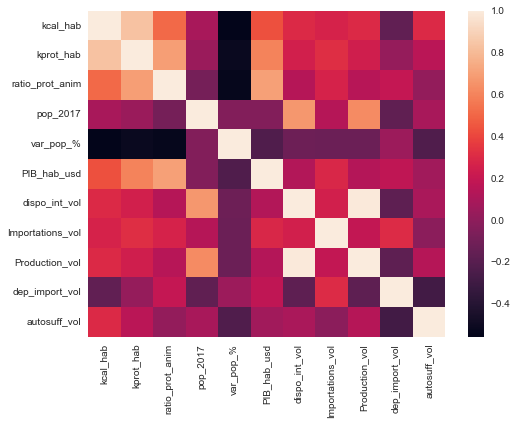

In [563]:
# voir les correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

In [564]:
#sns.pairplot(df)

In [565]:
#df.hist(figsize=(20,12))

<AxesSubplot:>

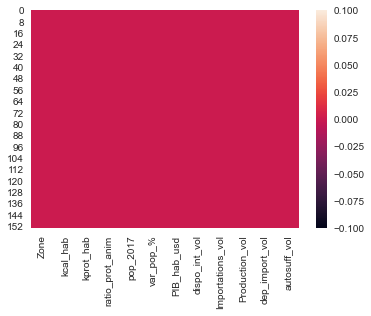

In [566]:
sns.heatmap(df.isna())

# <font color = 'orange'> 5. Dendrogramme, K-means, ACP </font>


## 📌6.1 Version 1

### 6.1.1 Classification Ascendante Hiérarchique (CAH)

In [567]:
from matplotlib.collections import LineCollection

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

Text(0.5, 0, 'distance')

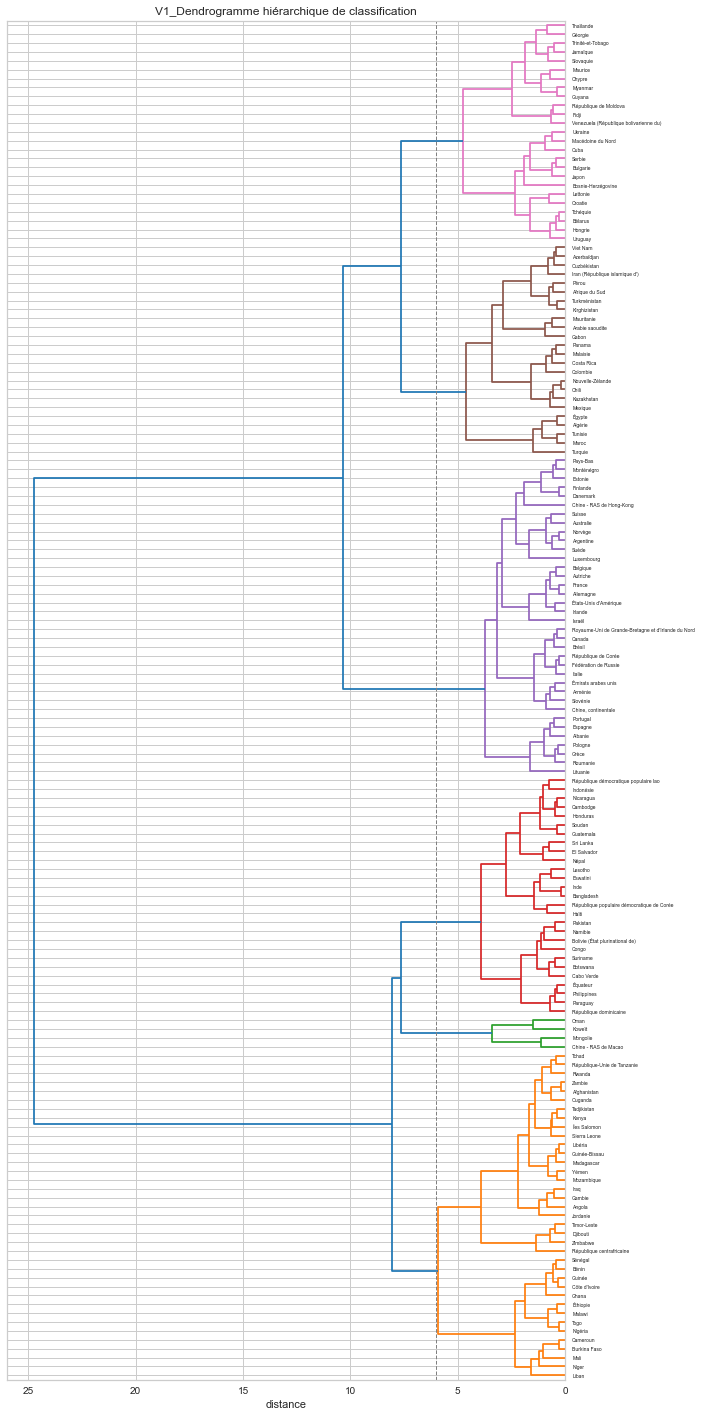

In [568]:
# Préparation des données pour le clustering
pca_col_1 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim','var_pop_%']].values
names_pays = df_zone.index

# Centrage et Réduction
std_scale_1 = preprocessing.StandardScaler().fit(pca_col_1)
X_scaled_1 = std_scale_1.transform(pca_col_1)

# Clustering hiérarchique
#dend = sch.dendrogram(sch.linkage(X_scaled, method='ward')) 2e facon
Z_1 = linkage(X_scaled_1, 'ward')


# Affichage du dendrogramme
plt.figure(figsize=(10,25))
sns.set_palette('tab10')
dendrogram(Z_1, labels = names_pays, orientation = "left", color_threshold=7)

plt.axvline(x=6, c='grey', lw=1, linestyle='dashed')
plt.title('V1_Dendrogramme hiérarchique de classification')
plt.xlabel('distance')

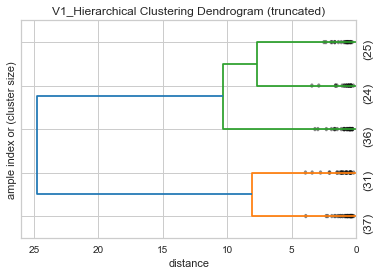

In [569]:
dendrogram(
    Z_1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
     orientation = "left"
)

plt.title('V1_Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('distance')
plt.ylabel('ample index or (cluster size)')
plt.show()

In [570]:
model_dend_1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model_dend_1.fit(X_scaled_1)
labels_dend_1 = model_dend_1.labels_
labels_dend_1

array([1, 4, 2, 4, 2, 1, 4, 2, 2, 2, 2, 4, 0, 2, 0, 3, 0, 2, 3, 1, 3, 1,
       0, 0, 1, 2, 4, 2, 0, 2, 3, 4, 0, 4, 3, 3, 1, 2, 1, 0, 2, 2, 0, 3,
       2, 2, 2, 4, 1, 1, 2, 0, 1, 1, 3, 3, 0, 0, 3, 0, 0, 4, 1, 2, 2, 2,
       3, 3, 1, 4, 1, 4, 0, 0, 3, 1, 1, 2, 2, 3, 1, 4, 1, 1, 4, 3, 4, 4,
       0, 2, 1, 3, 0, 0, 1, 1, 2, 4, 0, 0, 1, 4, 0, 4, 0, 2, 0, 2, 2, 4,
       2, 2, 1, 1, 2, 3, 0, 0, 0, 1, 3, 1, 3, 2, 0, 0, 2, 0, 2, 1, 1, 1,
       3, 3, 1, 1, 3, 4, 4, 4, 3, 3, 3, 4, 1, 1, 1, 4, 2, 0, 2, 1, 1],
      dtype=int64)

In [571]:
df_dend_1 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim','var_pop_%']].copy()
df_dend_1['label_dend'] = labels_dend_1
df_dend_1.head()

,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,label_dend
Zone,,,,,
Afghanistan,2044.0,55.54,20.057616,14.146796,1
Afrique du Sud,2900.0,83.56,42.233126,7.326988,4
Albanie,3365.0,117.77,54.411140,-1.037630,2
Algérie,3320.0,91.65,29.143481,9.677150,4
Allemagne,3483.0,103.04,60.918090,2.039455,2


In [572]:
def do_3d_scatter(x, y, z, figno=None, title=None):
    """
    Generate a 3D scatterplot figure and optionally give it a title.
 
    Parameters
    ----------
    x : WRITEME
    y : WRITEME
    z : WRITEME
    figno : WRITEME
    title : WRITEME
    """
    fig = pyplot.figure(figsize=(10,10))
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=df_dend_1["label_dend"])
    ax.set_xlabel("kcal_hab")
    ax.set_ylabel("kprot_hab")
    ax.set_zlabel("ratio_prot_anim")
    pyplot.suptitle(title)      

C:\Users\pouri\AppData\Local\Temp/ipykernel_58920/1294215385.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


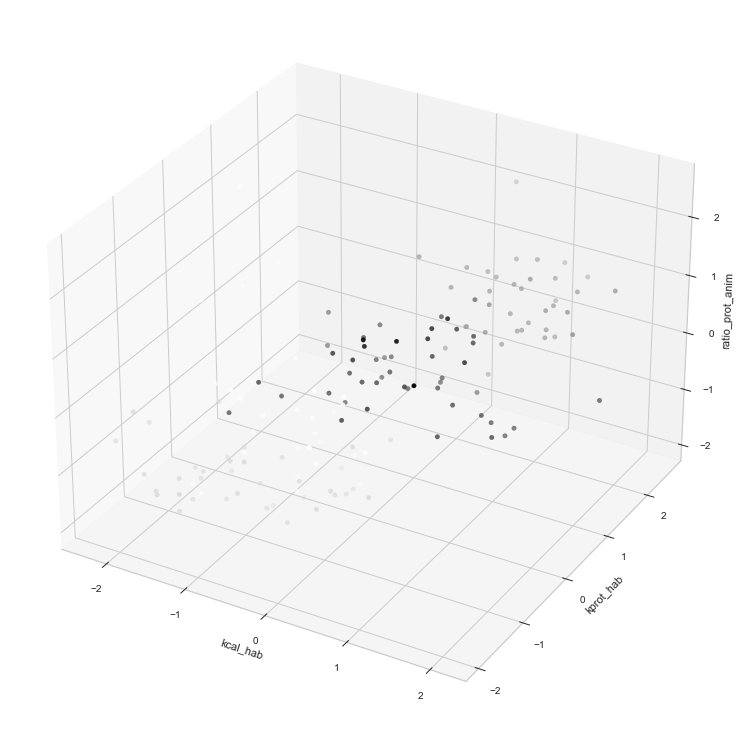

In [573]:
xs1 = X_scaled_1[:, 0]
ys1 = X_scaled_1[:, 1]
zs1 = X_scaled_1[:, 2]

do_3d_scatter(xs1, ys1, zs1, figno=None, title=None)

### 6.1.2 K-means

In [574]:
X_km_1 = pd.DataFrame(X_scaled_1, columns = ['kcal_hab', 'kprot_hab', 'ratio_prot_anim','var_pop_%'])
X_km_1

,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%
0,-1.453854,-1.174368,-1.345737,1.383628
1,0.313277,0.207556,0.008243,0.174914
2,1.273225,1.894767,0.751802,-1.307595
3,1.180327,0.606549,-0.790977,0.591447
4,1.516825,1.168295,1.149099,-0.762226
...,...,...,...,...
148,0.525911,1.202325,0.463339,-0.478042
149,-0.320496,-0.644679,0.270592,0.260863
150,2.105181,1.653596,1.394436,-0.521743
151,-0.859305,-0.647639,-1.960013,1.153881


C:\Users\pouri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


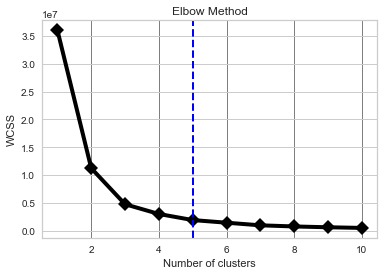

In [575]:
X_km_1 = df[['kcal_hab', 'kprot_hab', 'ratio_prot_anim','var_pop_%']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_km_1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, linewidth=4, color='black', marker= 'D', markersize=10)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(which='both', color='black', axis='x', alpha=0.5)

plt.axvline(x=5, linewidth=2, color='blue', linestyle='--')
plt.show()

### Silhouette score

In [576]:
# Clustering par K-means
kmeans_1 = KMeans(n_clusters=5, init='k-means++', max_iter = 300).fit(X_km_1.values)
kmeans_1_labels = kmeans_1.labels_

In [577]:
silhouette_score_1 = silhouette_score(X_km_1,kmeans_1_labels )
print(f'Silhouette Score(n=5): {silhouette_score_1}')

Silhouette Score(n=5): 0.5511492300974055


In [578]:
kmeans_per_k_1 = [KMeans(n_clusters=k, random_state=42).fit(X_km_1) for k in range(1, 10)]

silhouette_score_1 = [silhouette_score(X_km_1, model.labels_)
                   for model in kmeans_per_k_1[1:]]

silhouette_score_1


C:\Users\pouri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.5716087066279198,
 0.5740059241054363,
 0.5477001241626265,
 0.5511492300974055,
 0.5535103228519482,
 0.549727788235254,
 0.542442660483985,
 0.5375486757793737]

C:\Users\pouri\AppData\Local\Temp/ipykernel_58920/640248690.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  _ = plt.plot(range(2, 10), silhouette_score_1, "bo-", color='blue', linewidth=3, markersize=8, label='silhouette curve')


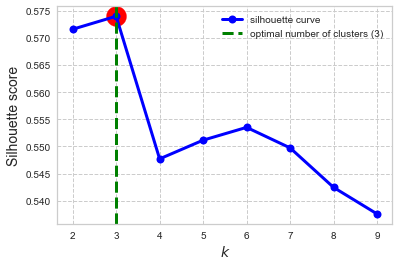

In [579]:
#rcParams['figur.figsize'] = 16, 5
_ = plt.plot(range(2, 10), silhouette_score_1, "bo-", color='blue', linewidth=3, markersize=8, label='silhouette curve')
_ = plt.xlabel("$k$", fontsize = 14, family='Arial')
_ = plt.ylabel("Silhouette score", fontsize = 14, family='Arial')
_ = plt.grid(which='major', color='#cccccc', linestyle='--')

#calculer le nombre optimal de clesters
k = np.argmax(silhouette_score_1) + 2 


#ligne vertical sur cluster optimal
_ = plt.axvline(x=k, linestyle='--', c= 'green', linewidth=3,
              label = 'optimal number of clusters ({})'.format(k))

_ =plt.scatter(k, silhouette_score_1[k-2], c='red', s=400)
_ = plt.legend(shadow=True)
_= plt.show()

In [580]:
X_km_1['clusters'] = kmeans_1_labels
X_km_1.head()

C:\Users\pouri\AppData\Local\Temp/ipykernel_58920/1340451095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_km_1['clusters'] = kmeans_1_labels


,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,clusters
0,2044.0,55.54,20.057616,14.146796,3
1,2900.0,83.56,42.233126,7.326988,0
2,3365.0,117.77,54.411140,-1.037630,4
3,3320.0,91.65,29.143481,9.677150,4
4,3483.0,103.04,60.918090,2.039455,4


In [581]:
kmeans_1.cluster_centers_

array([[3.05260000e+03, 9.33646667e+01, 5.18142312e+01, 2.91300607e+00],
       [2.41043333e+03, 6.50430000e+01, 3.21400445e+01, 9.23184558e+00],
       [2.73254286e+03, 7.35440000e+01, 3.93723695e+01, 6.47838926e+00],
       [2.00746154e+03, 5.75050000e+01, 3.15795820e+01, 1.13792500e+01],
       [3.39868750e+03, 1.03730937e+02, 5.38525452e+01, 2.59636033e+00]])

C:\Users\pouri\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


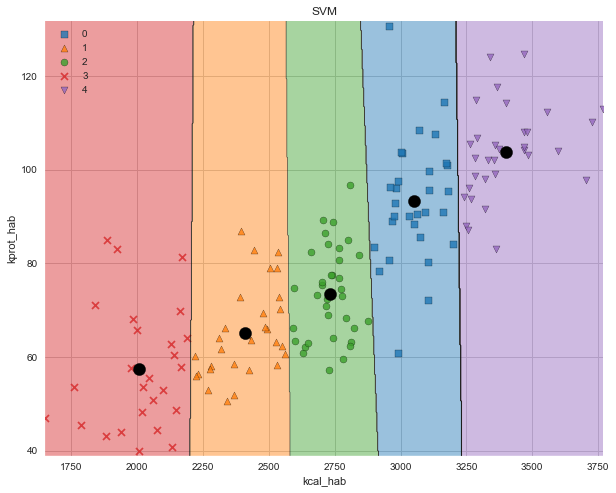

In [582]:
# Récupération des clusters attribués à chaque individu
plt.figure(figsize=(10,8))
#sns.scatterplot(x='kcal_hab', y ='kprot_hab', data=X_km_1, hue='clusters',ci=None, palette=['green','orange','brown','dodgerblue','red'], legend='full') 

Xp1 = X_km_1[['kcal_hab', 'kprot_hab' ]].values
yp1 = X_km_1.clusters.values

# Training a classifier
svm_1 = SVC(C=0.5, kernel='linear')
svm_1.fit(Xp1, yp1)


# Plotting decision regions
plot_decision_regions(Xp1, yp1, clf=svm_1, legend=2)

# Adding axes annotations
plt.xlabel('kcal_hab')
plt.ylabel('kprot_hab')
plt.title('SVM')


plt.scatter(kmeans_1.cluster_centers_[:, 0],kmeans_1.cluster_centers_[:, 1], s=150, c='black')
plt.show()

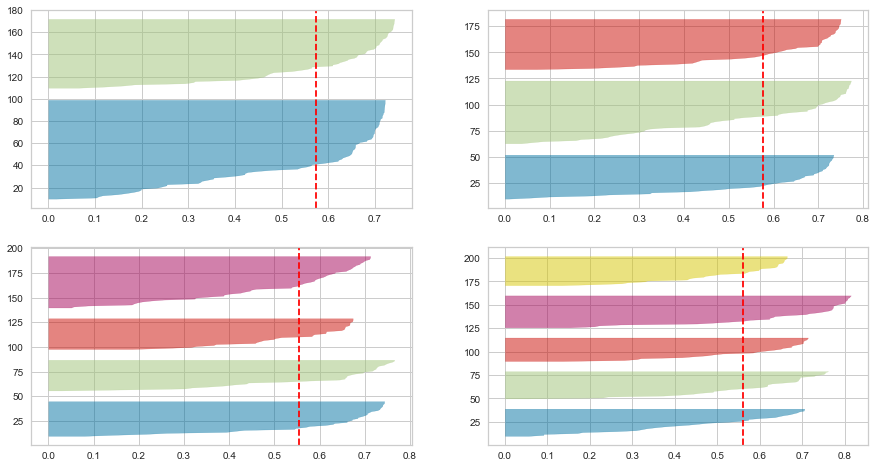

In [583]:


fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(Xp1)

### 6.1.3 ACP

#### 📌  <font color = 'green'> Cercle </font>

In [584]:
# choix du nombre de composantes à calculer
n_comp_1 = 4

# selection des colonnes à prendre en compte dans l'ACP
pca_col_1 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim','var_pop_%']]

In [585]:
X_1 = pca_col_1.values

features_1 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim','var_pop_%']].columns

In [586]:
# Centrage et Réduction
std_scale_1 = preprocessing.StandardScaler().fit(X_1)
scaled_data_1 = std_scale_1.transform(X_1)

[0.70853632 0.13838302 0.12273147 0.03034919]
[0.70853632 0.84691934 0.96965081 1.        ]


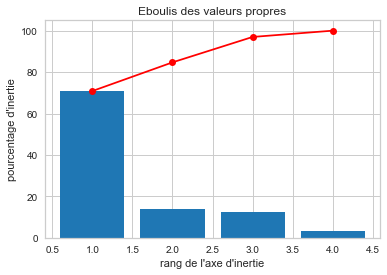

In [587]:
# Calcul des composantes principales
pca_1 = decomposition.PCA(n_components=n_comp_1)
pca_1.fit(scaled_data_1)

print(pca_1.explained_variance_ratio_)
print(pca_1.explained_variance_ratio_.cumsum())


# Eboulis des valeurs propres
display_scree_plot(pca_1)

In [588]:
pcs_1 = pca_1.components_
pcs_1

array([[ 0.51778276,  0.54413185,  0.48125087, -0.45190612],
       [-0.43075307, -0.41374514,  0.20253129, -0.77604628],
       [-0.43875381,  0.06240292,  0.79337604,  0.41731934],
       [-0.59485115,  0.7272148 , -0.31294271, -0.13920344]])

In [589]:
per_var_1 = np.round(pca_1.explained_variance_ratio_*100, decimals=1)
labels_1 = ['PC' + str(x) for x in range(1, len(per_var_1)+1)]

pca_data_1 = pca_1.transform(scaled_data_1)

pca_df_1 = pd.DataFrame(pca_data_1, index = df_zone.index, columns = labels_1 )
pca_df_1

,PC1,PC2,PC3,PC4
Zone,,,,
Afghanistan,-2.664699,-0.234172,0.074340,0.239342
Afrique du Sud,0.200070,-0.354893,-0.044964,-0.062343
Albanie,2.642973,-0.165378,-0.389617,0.567274
Algérie,0.293259,-1.378574,-0.860742,-0.095829
Allemagne,2.318552,-0.312502,0.000968,-0.306182
...,...,...,...,...
Émirats arabes unis,1.365543,-0.259170,0.012389,0.483057
Équateur,-0.504401,0.257149,0.423933,-0.399166
États-Unis d'Amérique,2.896653,-0.903666,0.068111,-0.413500


La deuxième méthode de Eboulis

In [590]:
#per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

#labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

#plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
#plt.ylabel('Variance(%)')
#plt.xlabel('Component principal')
#plt.title('Eboulis des valeurs propres')
#plt.show()

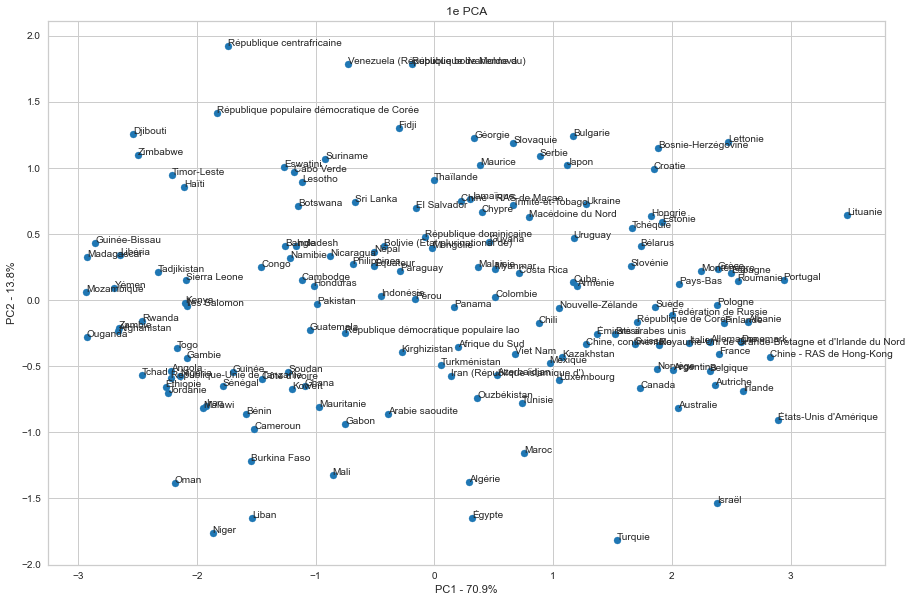

In [591]:
plt.figure(figsize=(15,10))
plt.scatter(pca_df_1.PC1, pca_df_1.PC2)
plt.title('1e PCA')
plt.xlabel('PC1 - {0}%'.format(per_var_1[0]))
plt.ylabel('PC2 - {0}%'.format(per_var_1[1]))

for sample in pca_df_1.index:
    plt.annotate(sample, (pca_df_1.PC1.loc[sample],  pca_df_1.PC2.loc[sample]) )
    
plt.show()    

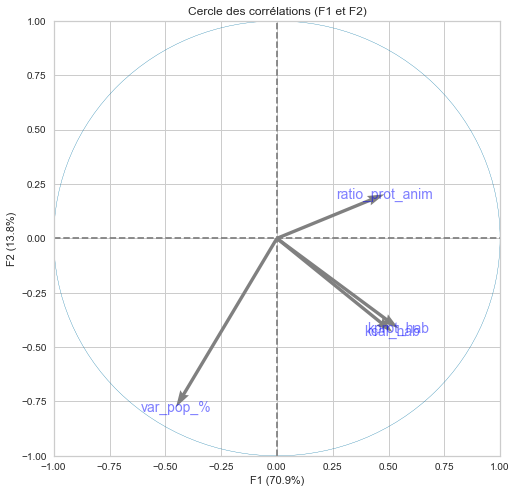

In [592]:
display_circles(pcs_1, 2, pca_1, [(0,1)], labels =np.array(features_1))

(-1.0, 1.0)

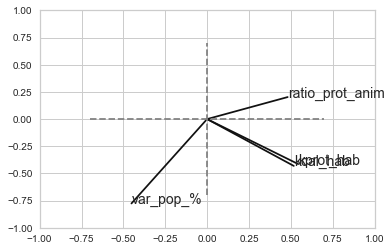

In [593]:
for i, (x, y) in enumerate(zip(pcs_1[0, :], pcs_1[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, pca_col_1.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

#### 📌  <font color = 'green'> K-means ACP </font>

In [594]:
pca_df_1['clusters'] = kmeans_1_labels
pca_df_1.head()

,PC1,PC2,PC3,PC4,clusters
Zone,,,,,
Afghanistan,-2.664699,-0.234172,0.074340,0.239342,3
Afrique du Sud,0.200070,-0.354893,-0.044964,-0.062343,0
Albanie,2.642973,-0.165378,-0.389617,0.567274,4
Algérie,0.293259,-1.378574,-0.860742,-0.095829,4
Allemagne,2.318552,-0.312502,0.000968,-0.306182,4


In [595]:
pca_df_1.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'clusters'], dtype='object')

Text(0.5, 1.0, 'Projection des 153 individus sur le 1e plan factoriel')

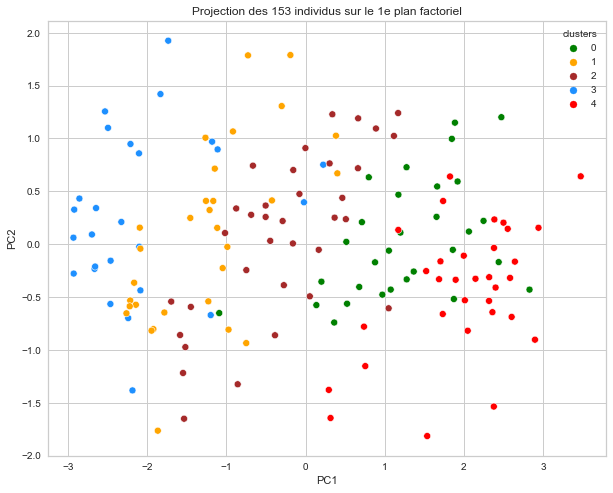

In [596]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_df_1.PC1, y=pca_df_1.PC2, hue=pca_df_1.clusters, ci=None, palette=['green','orange','brown','dodgerblue','red'], legend='full' )
plt.title("Projection des 153 individus sur le 1e plan factoriel")

## 📌6.2 Version 2

### 6.2.1 Classification Ascendante Hiérarchique (CAH)

Text(0.5, 0, 'distance')

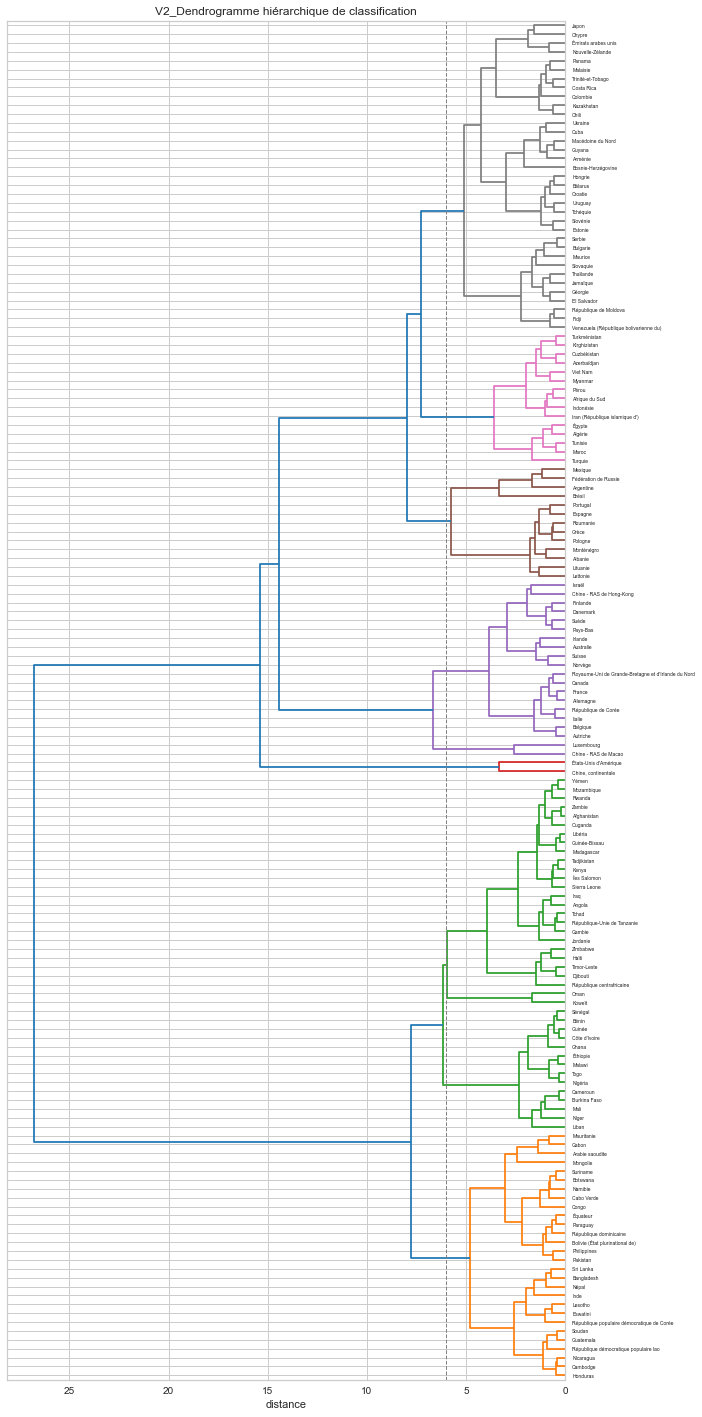

In [597]:
# Préparation des données pour le clustering
pca_col_2 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim',
                  'var_pop_%', 'PIB_hab_usd', 'dispo_int_vol']].values
names_pays = df_zone.index

# Centrage et Réduction
std_scale_2 = preprocessing.StandardScaler().fit(pca_col_2)
X_scaled_2 = std_scale_2.transform(pca_col_2)

# Clustering hiérarchique
#dend = sch.dendrogram(sch.linkage(X_scaled, method='ward')) 2e facon
Z_2 = linkage(X_scaled_2, 'ward')


# Affichage du dendrogramme
plt.figure(figsize=(10,25))
sns.set_palette('tab10')
dendrogram(Z_2, labels = names_pays, orientation = "left", color_threshold=7)

plt.axvline(x=6, c='grey', lw=1, linestyle='dashed')
plt.title('V2_Dendrogramme hiérarchique de classification')
plt.xlabel('distance')

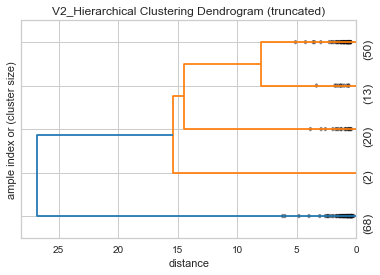

In [598]:
dendrogram(
    Z_2,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
     orientation = "left"
)

plt.title('V2_Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('distance')
plt.ylabel('ample index or (cluster size)')
plt.show()

In [599]:
model_dend_2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model_dend_2.fit(X_scaled_2)
labels_dend_2 = model_dend_2.labels_

In [600]:
df_dend_2 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim',
                     'var_pop_%', 'PIB_hab_usd', 'dispo_int_vol']].copy()
df_dend_2['label_dend'] = labels_dend_2
df_dend_2

,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dispo_int_vol,label_dend
Zone,,,,,,,
Afghanistan,2044.0,55.54,20.057616,14.146796,513.085978,57000.0,0
Afrique du Sud,2900.0,83.56,42.233126,7.326988,6121.876572,2116000.0,1
Albanie,3365.0,117.77,54.411140,-1.037630,4514.204908,33000.0,4
Algérie,3320.0,91.65,29.143481,9.677150,4109.701336,304000.0,1
Allemagne,3483.0,103.04,60.918090,2.039455,44552.061000,1557000.0,3
...,...,...,...,...,...,...,...
Émirats arabes unis,3003.0,103.73,49.686687,3.642876,40644.804043,480000.0,1
Équateur,2593.0,66.28,46.529873,7.811926,6213.501276,340000.0,0
États-Unis d'Amérique,3768.0,112.88,64.936215,3.396305,60116.568493,18305000.0,2


### 6.2.2 K-means

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


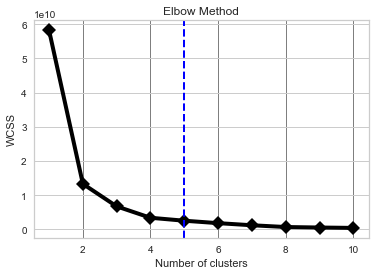

In [601]:
X_km_2 = df[['kcal_hab', 'kprot_hab', 'ratio_prot_anim', 'var_pop_%', 'PIB_hab_usd']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_km_2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, linewidth=4, color='black', marker= 'D', markersize=10)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(which='both', color='black', axis='x', alpha=0.5)

plt.axvline(x=5, linewidth=2, color='blue', linestyle='--')
plt.show()

### Silhouette score

In [602]:
# Clustering par K-means
kmeans_2 = KMeans(n_clusters=5, init='k-means++', max_iter = 300).fit(X_km_2.values)
kmeans_2_labels = kmeans_2.labels_

In [603]:
silhouette_score_2 = silhouette_score(X_km_2,kmeans_2_labels )
print(f'Silhouette Score(n=5): {silhouette_score(X_km_2, kmeans_2_labels)}')

Silhouette Score(n=5): 0.6491826380507785


In [604]:
kmeans_per_k_2 = [KMeans(n_clusters=k, random_state=42).fit(X_km_2) for k in range(1, 10)]

silhouette_score_2 = [silhouette_score(X_km_2, model.labels_) for model in kmeans_per_k_2[1:]]

silhouette_score_2

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.797950783598356,
 0.784013831030425,
 0.7063681684536905,
 0.6241334186676536,
 0.5960518448259272,
 0.629625079981507,
 0.6235256917963625,
 0.5952304243197741]

C:\Users\pouri\AppData\Local\Temp/ipykernel_58920/3928646898.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  _ = plt.plot(range(2, 10), silhouette_score_2, "bo-", color='blue', linewidth=3, markersize=8, label='silhouette curve')


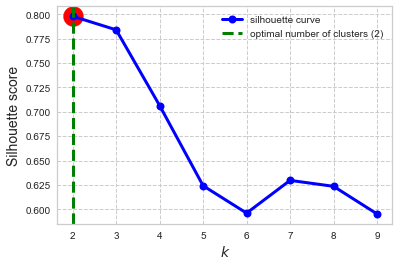

In [605]:
#rcParams['figur.figsize'] = 16, 5
_ = plt.plot(range(2, 10), silhouette_score_2, "bo-", color='blue', linewidth=3, markersize=8, label='silhouette curve')
_ = plt.xlabel("$k$", fontsize = 14, family='Arial')
_ = plt.ylabel("Silhouette score", fontsize = 14, family='Arial')
_ = plt.grid(which='major', color='#cccccc', linestyle='--')

#calculer le nombre optimal de clesters
k = np.argmax(silhouette_score_2) + 2 


#ligne vertical sur cluster optimal
_ = plt.axvline(x=k, linestyle='--', c= 'green', linewidth=3,
              label = 'optimal number of clusters ({})'.format(k))

_ =plt.scatter(k, silhouette_score_2[k -2], c='red', s=400)
_ = plt.legend(shadow=True)
_= plt.show()

In [606]:
X_km_2['clusters'] = kmeans_2.labels_
X_km_2

C:\Users\pouri\AppData\Local\Temp/ipykernel_58920/1961814331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_km_2['clusters'] = kmeans_2.labels_


,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,clusters
0,2044.0,55.54,20.057616,14.146796,513.085978,4
1,2900.0,83.56,42.233126,7.326988,6121.876572,4
2,3365.0,117.77,54.411140,-1.037630,4514.204908,4
3,3320.0,91.65,29.143481,9.677150,4109.701336,4
4,3483.0,103.04,60.918090,2.039455,44552.061000,3
...,...,...,...,...,...,...
148,3003.0,103.73,49.686687,3.642876,40644.804043,0
149,2593.0,66.28,46.529873,7.811926,6213.501276,4
150,3768.0,112.88,64.936215,3.396305,60116.568493,3
151,2332.0,66.22,9.996980,12.850516,721.753494,4


In [607]:
kmeans_2.cluster_centers_

array([[2.98088889e+03, 9.78333333e+01, 5.57328099e+01, 3.53970776e+00,
        3.39919551e+04],
       [3.05933333e+03, 9.20744444e+01, 5.57785322e+01, 2.82517058e+00,
        1.49603614e+04],
       [2.92960000e+03, 9.91100000e+01, 6.89681160e+01, 6.68045440e+00,
        8.39746862e+04],
       [3.33184615e+03, 1.08020000e+02, 6.32006283e+01, 3.75010680e+00,
        4.92025229e+04],
       [2.55646465e+03, 6.94390909e+01, 3.29994685e+01, 7.87618755e+00,
        3.22767944e+03]])

C:\Users\pouri\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


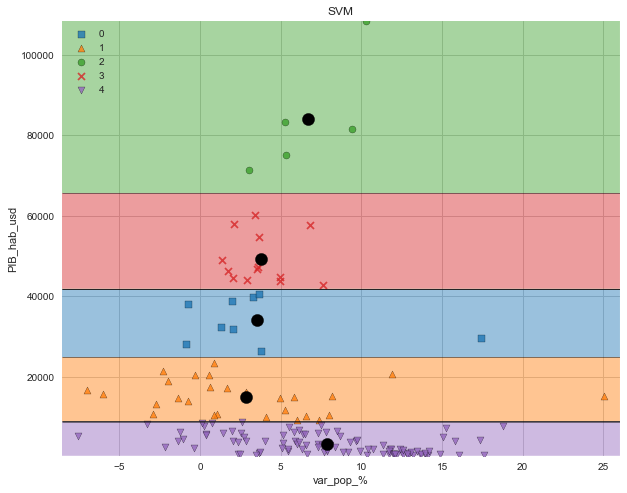

In [608]:
# Récupération des clusters attribués à chaque individu
plt.figure(figsize=(10,8))
#sns.scatterplot(x='kcal_hab', y ='kprot_hab', data=X_km_2, hue='clusters',ci=None, palette=["C0", "C1", "k","C3","C4"])


Xp2 = X_km_2[['var_pop_%', 'PIB_hab_usd' ]].values
yp2 = X_km_2.clusters.values

# Training a classifier
svm_2 = SVC(C=0.5, kernel='linear')
svm_2.fit(Xp2, yp2)


# Plotting decision regions
plot_decision_regions(Xp2, yp2, clf=svm_2, legend=2)

# Adding axes annotations
plt.xlabel('var_pop_%')
plt.ylabel('PIB_hab_usd')
plt.title('SVM')


plt.scatter(kmeans_2.cluster_centers_[:, 3],kmeans_2.cluster_centers_[:, 4], s=150, c='black')
plt.show()

### 6.2.3 ACP

#### 📌 <font color = 'green'> Cercle </font>

In [609]:
# choix du nombre de composantes à calculer
n_comp_2 = 5

# selection des colonnes à prendre en compte dans l'ACP
pca_col_2 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim', 'var_pop_%', 'PIB_hab_usd']]

In [610]:
X_2 = pca_col_2.values

features_2 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim', 'var_pop_%', 'PIB_hab_usd']].columns

In [611]:
# Centrage et Réduction
std_scale_2 = preprocessing.StandardScaler().fit(X_2)
scaled_data_2 = std_scale_2.transform(X_2)

[0.6542157  0.16553284 0.10925543 0.04682881 0.02416723]
[0.6542157  0.81974853 0.92900396 0.97583277 1.        ]


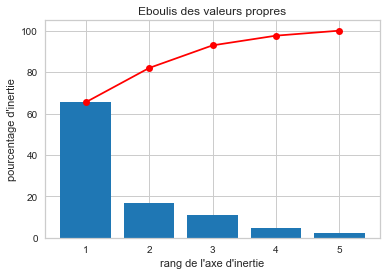

In [612]:
# Calcul des composantes principales
pca_2 = decomposition.PCA(n_components=n_comp_2)
pca_2.fit(scaled_data_2)

print(pca_2.explained_variance_ratio_)
print(pca_2.explained_variance_ratio_.cumsum())


# Eboulis des valeurs propres
display_scree_plot(pca_2)

In [613]:
pcs_2 = pca_2.components_
pcs_2

array([[ 0.46174556,  0.505498  ,  0.47155607, -0.38165648,  0.40402477],
       [-0.31307101, -0.03912761,  0.26740385,  0.61271569,  0.67344654],
       [ 0.56524476,  0.38327204, -0.44534326,  0.57570512, -0.06191849],
       [-0.1423554 ,  0.3059998 ,  0.62131298,  0.35062618, -0.61410954],
       [-0.59077143,  0.70880707, -0.34895504, -0.15666115,  0.04763732]])

In [614]:
per_var_2 = np.round(pca_2.explained_variance_ratio_*100, decimals=1)
labels_2 = ['PC' + str(x) for x in range(1, len(per_var_2)+1)]

pca_data_2 = pca_2.transform(scaled_data_2)

pca_df_2 = pd.DataFrame(pca_data_2, index = df_zone.index, columns = labels_2 )
pca_df_2

,PC1,PC2,PC3,PC4,PC5
Zone,,,,,
Afghanistan,-2.699750,0.535414,0.165697,-0.089735,0.247249
Afrique du Sud,0.030728,-0.256809,0.377561,0.322446,-0.086627
Albanie,2.210004,-1.388384,0.387302,0.694864,0.511027
Algérie,0.055251,-0.571831,1.622693,0.033933,-0.107323
Allemagne,2.763678,0.386351,0.256517,-0.384442,-0.274120
...,...,...,...,...,...
Émirats arabes unis,1.810572,0.551109,0.190857,-0.436396,0.520642
Équateur,-0.599910,0.100931,-0.374959,0.342135,-0.421072
États-Unis d'Amérique,3.626929,0.933431,0.754870,-0.572918,-0.362997


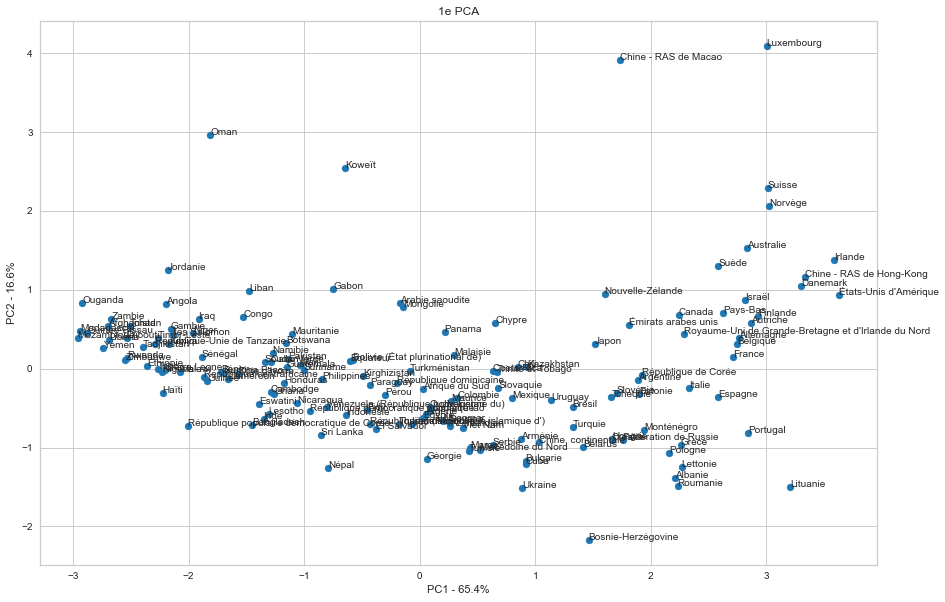

In [615]:
plt.figure(figsize=(15,10))
plt.scatter(pca_df_2.PC1, pca_df_2.PC2)
plt.title('1e PCA')
plt.xlabel('PC1 - {0}%'.format(per_var_2[0]))
plt.ylabel('PC2 - {0}%'.format(per_var_2[1]))

for sample in pca_df_2.index:
    plt.annotate(sample, (pca_df_2.PC1.loc[sample],  pca_df_2.PC2.loc[sample]) )
    
plt.show()   

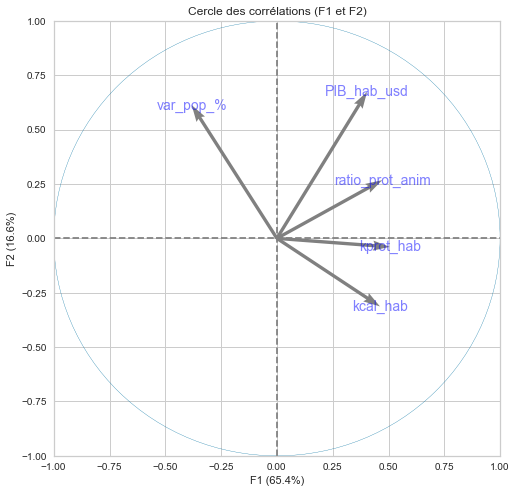

In [616]:
display_circles(pcs_2, 5, pca_2, [(0,1)], labels =np.array(features_2))

#### 📌 <font color = 'green'> K-means ACP </font>

In [617]:
pca_df_2['clusters'] = kmeans_2.labels_
pca_df_2.head()

,PC1,PC2,PC3,PC4,PC5,clusters
Zone,,,,,,
Afghanistan,-2.699750,0.535414,0.165697,-0.089735,0.247249,4
Afrique du Sud,0.030728,-0.256809,0.377561,0.322446,-0.086627,4
Albanie,2.210004,-1.388384,0.387302,0.694864,0.511027,4
Algérie,0.055251,-0.571831,1.622693,0.033933,-0.107323,4
Allemagne,2.763678,0.386351,0.256517,-0.384442,-0.274120,3


In [618]:
pca_df_2.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'clusters'], dtype='object')

Text(0.5, 1.0, 'Projection des 153 individus sur le 1e plan factoriel')

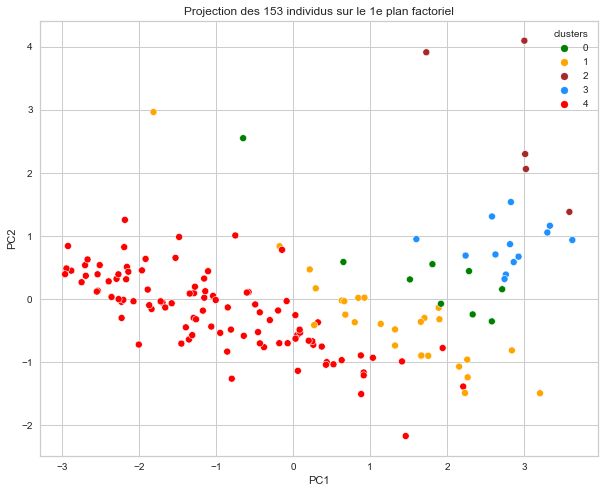

In [619]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_df_2.PC1, y=pca_df_2.PC2, hue=pca_df_2.clusters, ci=None, palette=['green','orange','brown','dodgerblue','red'], legend='full' ) #
plt.title("Projection des 153 individus sur le 1e plan factoriel")

## 📌6.3 Version 3

### 6.3.1 Classification Ascendante Hiérarchique (CAH)

Text(0.5, 0, 'distance')

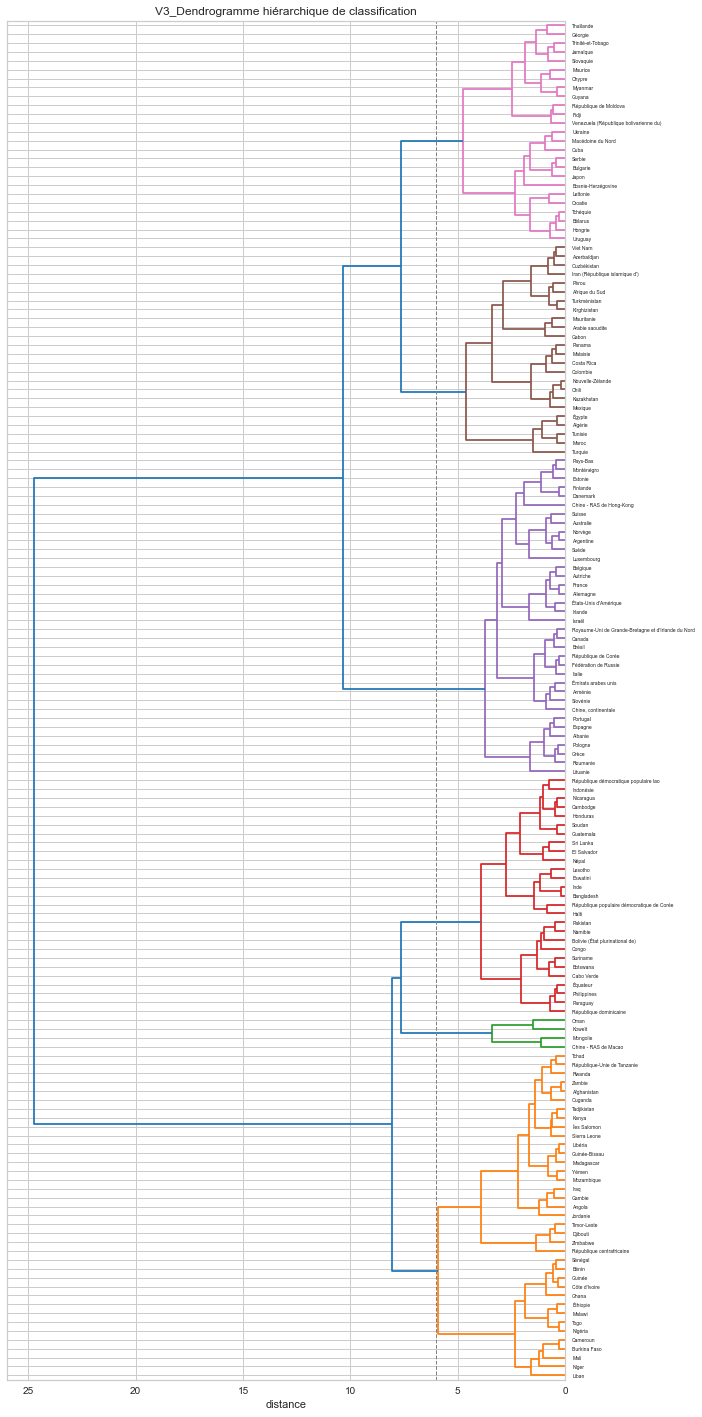

In [620]:
# Préparation des données pour le clustering
pca_col_3 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim',
                     'var_pop_%', 'PIB_hab_usd','dep_import_vol', 'autosuff_vol']].values
names_pays = df_zone.index

# Centrage et Réduction
std_scale_3 = preprocessing.StandardScaler().fit(pca_col_3)
X_scaled_3 = std_scale_3.transform(pca_col_3)

# Clustering hiérarchique
#dend = sch.dendrogram(sch.linkage(X_scaled, method='ward')) 2e facon
Z_3 = linkage(X_scaled_1, 'ward')


# Affichage du dendrogramme
plt.figure(figsize=(10,25))
sns.set_palette('tab10')
dendrogram(Z_3, labels = names_pays, orientation = "left", color_threshold=7)

plt.axvline(x=6, c='grey', lw=1, linestyle='dashed')
plt.title('V3_Dendrogramme hiérarchique de classification')
plt.xlabel('distance')

Regroupement hiérarchique

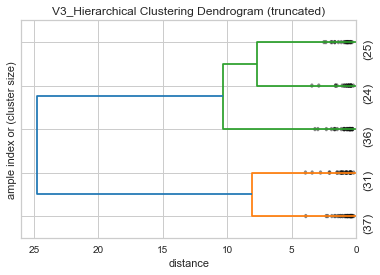

In [621]:
dendrogram(
    Z_3,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
     orientation = "left"
)

plt.title('V3_Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('distance')
plt.ylabel('ample index or (cluster size)')
plt.show()

In [622]:
model_dend_3 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model_dend_3.fit(X_scaled_3)
labels_dend_3 = model_dend_3.labels_

In [623]:
df_dend_3 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim',
                     'var_pop_%', 'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol']].copy()
df_dend_3['label_dend'] = labels_dend_3
df_dend_3 = df_dend_3.sort_values(by=['label_dend'])
df_dend_3

,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dep_import_vol,autosuff_vol,label_dend
Zone,,,,,,,,
Canada,3356.0,102.15,54.263338,4.927748,44906.748920,12.718379,99.091544,0
Danemark,3286.0,114.82,66.504093,2.117327,57938.797728,91.095890,104.109589,0
Suède,3007.0,103.59,66.502558,3.655606,54621.345824,45.405405,84.864865,0
Luxembourg,2809.0,96.83,70.453372,10.314575,108431.931751,100.000000,0.000000,0
Italie,3468.0,104.24,52.484651,1.309019,32333.550863,8.276451,112.542662,0
...,...,...,...,...,...,...,...,...
Oman,1841.0,71.08,59.214969,25.030369,15130.543438,110.526316,5.263158,3
Guinée-Bissau,2008.0,39.88,23.871615,12.207237,738.550286,100.000000,75.000000,3
Malawi,2479.0,69.33,12.649647,12.870152,359.232443,0.000000,448.275862,4


In [624]:
#df_dend_3.to_csv('liste_pays_Dendrogramme_export.csv')

### 6.3.2 K-means

In [625]:
X_km_3 = df[['kcal_hab', 'kprot_hab', 'ratio_prot_anim',
                     'var_pop_%', 'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol']]

# Centrage et Réduction
X_km_3_scale = preprocessing.StandardScaler().fit(X_km_3)
X_km_3_scaled = X_km_3_scale.transform(X_km_3)

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


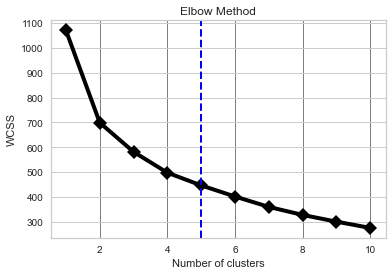

In [626]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_km_3_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, linewidth=4, color='black', marker= 'D', markersize=10)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(which='both', color='black', axis='x', alpha=0.5)

plt.axvline(x=5, linewidth=2, color='blue', linestyle='--')
plt.show()

### Silhouette score

In [627]:
# Clustering par K-means
kmeans_3 = KMeans(n_clusters=5, init='k-means++', max_iter = 300).fit(X_km_3_scaled)
kmeans_3_labels = kmeans_3.labels_

In [628]:
silhouette_score_3 = silhouette_score(X_km_3_scaled,kmeans_3_labels )
print(f'Silhouette Score(n=5): {silhouette_score(X_km_3_scaled, kmeans_3_labels)}')

Silhouette Score(n=5): 0.2638976536149071


In [629]:
kmeans_per_k_3 = [KMeans(n_clusters=k, random_state=42).fit(X_km_3_scaled) for k in range(1, 10)]

silhouette_score_3 = [silhouette_score(X_km_3_scaled, model.labels_) for model in kmeans_per_k_3[1:]]

silhouette_score_3

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.31407419101276335,
 0.23571863362706427,
 0.24916037526314808,
 0.23946005965756947,
 0.23217724189167943,
 0.2302527862333106,
 0.24150705321216376,
 0.22740625414473578]

C:\Users\pouri\AppData\Local\Temp/ipykernel_58920/2367783512.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  _ = plt.plot(range(2, 10), silhouette_score_3, "bo-", color='blue', linewidth=3, markersize=8, label='silhouette curve')


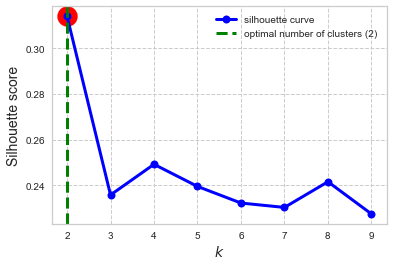

In [630]:
#rcParams['figur.figsize'] = 16, 5
_ = plt.plot(range(2, 10), silhouette_score_3, "bo-", color='blue', linewidth=3, markersize=8, label='silhouette curve')
_ = plt.xlabel("$k$", fontsize = 14, family='Arial')
_ = plt.ylabel("Silhouette score", fontsize = 14, family='Arial')
_ = plt.grid(which='major', color='#cccccc', linestyle='--')

#calculer le nombre optimal de clesters
k = np.argmax(silhouette_score_3) + 2 


#ligne vertical sur cluster optimal
_ = plt.axvline(x=k, linestyle='--', c= 'green', linewidth=3,
              label = 'optimal number of clusters ({})'.format(k))

_ =plt.scatter(k, silhouette_score_3[k -2], c='red', s=400)
_ = plt.legend(shadow=True)
_= plt.show()

In [631]:
X_km_3_scaled = pd.DataFrame(X_km_3_scaled, columns=['kcal_hab', 'kprot_hab', 'ratio_prot_anim',
                     'var_pop_%', 'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol'])
X_km_3_scaled['clusters'] = kmeans_3.labels_
X_km_3_scaled

,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dep_import_vol,autosuff_vol,clusters
0,-1.453854,-1.174368,-1.345737,1.383628,-0.673568,0.128355,-0.666406,3
1,0.313277,0.207556,0.008243,0.174914,-0.386054,-0.347992,-0.166190,2
2,1.273225,1.894767,0.751802,-1.307595,-0.468465,0.302669,-0.831019,2
3,1.180327,0.606549,-0.790977,0.591447,-0.489201,-0.771432,0.155482,2
4,1.516825,1.168295,1.149099,-0.762226,1.583929,0.185711,0.147714,0
...,...,...,...,...,...,...,...,...
148,0.525911,1.202325,0.463339,-0.478042,1.383638,0.952505,-1.331894,0
149,-0.320496,-0.644679,0.270592,0.260863,-0.381357,-0.783219,0.194443,1
150,2.105181,1.653596,1.394436,-0.521743,2.381787,-0.771180,0.528039,0
151,-0.859305,-0.647639,-1.960013,1.153881,-0.662871,-0.758334,0.170942,1


In [632]:
X_km_3 = df[['Zone','kcal_hab', 'kprot_hab', 'ratio_prot_anim',
                     'var_pop_%', 'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol']].copy()
X_km_3['clusters'] = kmeans_3.labels_
X_km_3

,Zone,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dep_import_vol,autosuff_vol,clusters
0,Afghanistan,2044.0,55.54,20.057616,14.146796,513.085978,50.877193,49.122807,3
1,Afrique du Sud,2900.0,83.56,42.233126,7.326988,6121.876572,24.291115,78.686200,2
2,Albanie,3365.0,117.77,54.411140,-1.037630,4514.204908,60.606061,39.393939,2
3,Algérie,3320.0,91.65,29.143481,9.677150,4109.701336,0.657895,97.697368,2
4,Allemagne,3483.0,103.04,60.918090,2.039455,44552.061000,54.078356,97.238279,0
...,...,...,...,...,...,...,...,...,...
148,Émirats arabes unis,3003.0,103.73,49.686687,3.642876,40644.804043,96.875000,9.791667,0
149,Équateur,2593.0,66.28,46.529873,7.811926,6213.501276,0.000000,100.000000,1
150,États-Unis d'Amérique,3768.0,112.88,64.936215,3.396305,60116.568493,0.671948,119.715925,0
151,Éthiopie,2332.0,66.22,9.996980,12.850516,721.753494,1.388889,98.611111,1


In [633]:
kmeans_3.cluster_centers_

array([[ 0.93683601,  1.31656377,  1.31860666, -0.31408086,  2.22948118,
         0.3282691 , -0.12819471],
       [-0.71399941, -0.8470787 , -0.93360681,  0.61285626, -0.57671841,
        -0.54656174,  0.36189498],
       [ 0.60385044,  0.52314283,  0.42877183, -0.72363138, -0.12711779,
        -0.28608561,  0.1221733 ],
       [-0.96543114, -0.80206247, -0.46311744,  0.91232605, -0.4666078 ,
         1.0908627 , -1.09013509],
       [ 1.42392705,  1.00036276,  1.18713104, -0.74471397,  1.68403178,
         2.9047667 ,  4.24669815]])

In [634]:
center = pd.DataFrame(kmeans_3.cluster_centers_, columns=['kcal_hab', 'kprot_hab', 'ratio_prot_anim',
                     'var_pop_%', 'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol'])
center

,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dep_import_vol,autosuff_vol
0,0.936836,1.316564,1.318607,-0.314081,2.229481,0.328269,-0.128195
1,-0.713999,-0.847079,-0.933607,0.612856,-0.576718,-0.546562,0.361895
2,0.603850,0.523143,0.428772,-0.723631,-0.127118,-0.286086,0.122173
3,-0.965431,-0.802062,-0.463117,0.912326,-0.466608,1.090863,-1.090135
4,1.423927,1.000363,1.187131,-0.744714,1.684032,2.904767,4.246698


In [635]:
#center.to_csv('centroïdes_export.csv')


C:\Users\pouri\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


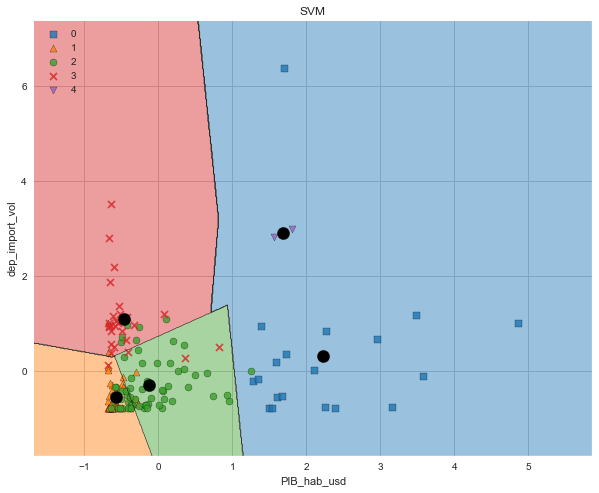

In [636]:
# Récupération des clusters attribués à chaque individu
plt.figure(figsize=(10,8))
#sns.scatterplot(x='kcal_hab', y ='kprot_hab', data=X_km_2, hue='clusters',ci=None, palette=["C0", "C1", "k","C3","C4"])


Xp3 = X_km_3_scaled[['PIB_hab_usd', 'dep_import_vol' ]].values
yp3 = X_km_3.clusters.values

# Training a classifier
svm_3 = SVC(C=0.5, kernel='linear')
svm_3.fit(Xp3, yp3)


# Plotting decision regions
plot_decision_regions(Xp3, yp3, clf=svm_3, legend=2)

# Adding axes annotations
plt.xlabel('PIB_hab_usd')
plt.ylabel('dep_import_vol')
plt.title('SVM')


plt.scatter(kmeans_3.cluster_centers_[:, 4],kmeans_3.cluster_centers_[:, 5], s=150, c='black')
plt.show()

In [637]:
#sns.displot(np.log(1+df_v3.PIB_hab_usd))

In [638]:
#df_v3.PIB_hab_usd = np.log(1+df_v3.PIB_hab_usd)

### 6.3.3 ACP

#### 📌 <font color = 'green'> Cercle </font>

In [639]:
# choix du nombre de composantes à calculer
n_comp_3 = 6

# selection des colonnes à prendre en compte dans l'ACP
pca_col_3 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim',
       'var_pop_%', 'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol']]

In [640]:
X_3 = pca_col_3.values

features_3 = df_zone[['kcal_hab', 'kprot_hab', 'ratio_prot_anim',
       'var_pop_%', 'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol']].columns

In [641]:
# Centrage et Réduction
std_scale_3 = preprocessing.StandardScaler().fit(X_3)
scaled_data_3 = std_scale_3.transform(X_3)

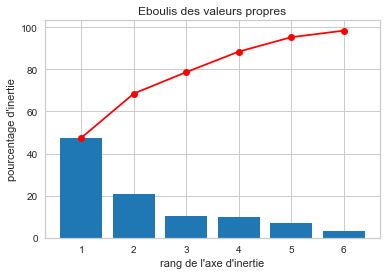

variance ratio: [0.47469996 0.20992194 0.10180911 0.0972465  0.06860497 0.03098916]
variance ratio cumulé [0.47469996 0.6846219  0.78643101 0.88367751 0.95228248 0.98327164]


In [642]:
# Calcul des composantes principales
pca_3 = decomposition.PCA(n_components=n_comp_3)
pca_3.fit(scaled_data_3)


# Eboulis des valeurs propres
display_scree_plot(pca_3)

print('variance ratio:',pca_3.explained_variance_ratio_)
print('variance ratio cumulé', pca_3.explained_variance_ratio_.cumsum())

In [643]:
pcs_3 = pca_3.components_


In [644]:
per_var_3 = np.round(pca_3.explained_variance_ratio_*100, decimals=1)
labels_3 = ['PC' + str(x) for x in range(1, len(per_var_3)+1)]

pca_data_3 = pca_3.transform(scaled_data_3)

pca_df_3 = pd.DataFrame(pca_data_3, index = df_zone.index, columns = labels_3 )
pca_df_3

,PC1,PC2,PC3,PC4,PC5,PC6
Zone,,,,,,
Afghanistan,-2.770300,0.456229,0.281069,-0.303804,-0.081636,-0.140476
Afrique du Sud,0.003811,-0.283523,-0.291013,-0.363331,-0.299806,0.278634
Albanie,2.080079,0.269824,-1.705462,-0.020615,-0.913693,0.379749
Algérie,0.078125,-1.111538,-0.090543,-0.812907,-1.292278,-0.031423
Allemagne,2.757139,0.345484,0.270411,-0.301393,-0.112299,-0.377976
...,...,...,...,...,...,...
Émirats arabes unis,1.606700,1.736201,-0.356887,-0.518992,-0.353531,-0.695133
Équateur,-0.579408,-0.564668,0.048237,-0.259702,0.635527,0.465996
États-Unis d'Amérique,3.650666,-0.304554,0.857021,-1.202508,-0.008499,-0.466153


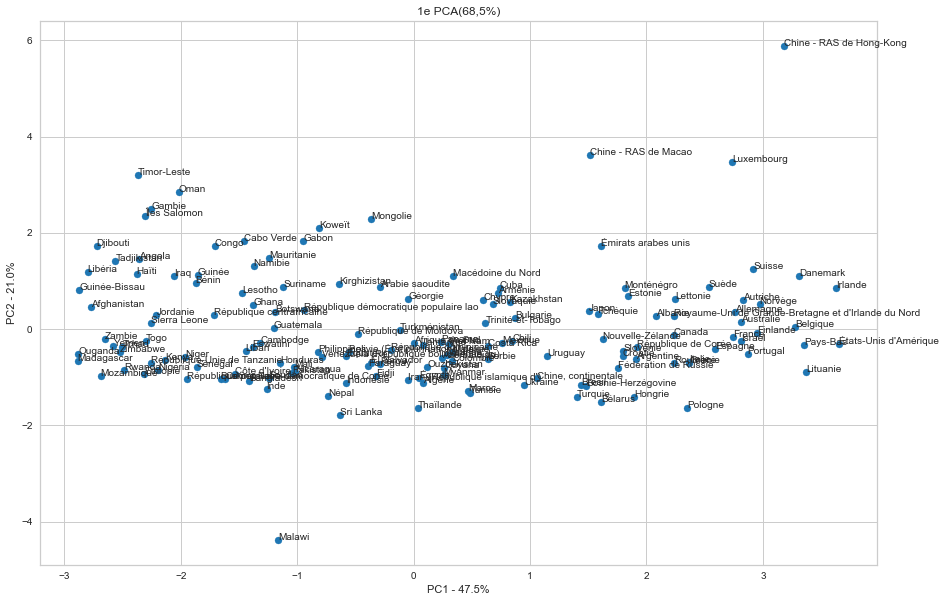

In [645]:
plt.figure(figsize=(15,10))
plt.scatter(pca_df_3.PC1, pca_df_3.PC2)
plt.title('1e PCA(68,5%)')
plt.xlabel('PC1 - {0}%'.format(per_var_3[0]))
plt.ylabel('PC2 - {0}%'.format(per_var_3[1]))

for sample in pca_df_3.index:
    plt.annotate(sample, (pca_df_3.PC1.loc[sample],  pca_df_3.PC2.loc[sample]) )
    
plt.show() 

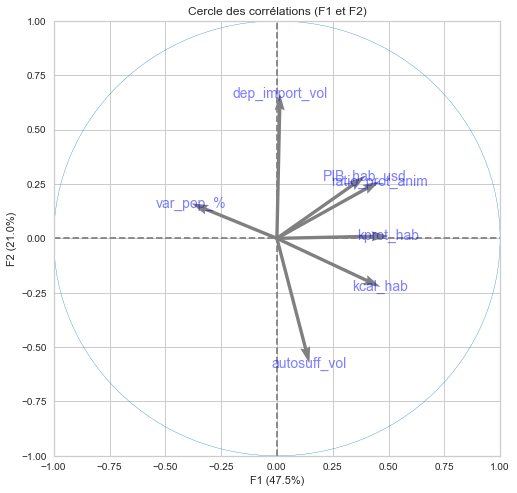

In [646]:
display_circles(pcs_3, 7, pca_3, [(0,1)], labels =np.array(features_3))

#### 📌  <font color = 'green'> K-means ACP </font>

In [647]:
pca_df_3['clusters'] = kmeans_3.labels_
pca_df_3.head()

,PC1,PC2,PC3,PC4,PC5,PC6,clusters
Zone,,,,,,,
Afghanistan,-2.770300,0.456229,0.281069,-0.303804,-0.081636,-0.140476,3
Afrique du Sud,0.003811,-0.283523,-0.291013,-0.363331,-0.299806,0.278634,2
Albanie,2.080079,0.269824,-1.705462,-0.020615,-0.913693,0.379749,2
Algérie,0.078125,-1.111538,-0.090543,-0.812907,-1.292278,-0.031423,2
Allemagne,2.757139,0.345484,0.270411,-0.301393,-0.112299,-0.377976,0


Text(0.5, 1.0, 'Projection des 153 individus sur le 1e plan factoriel')

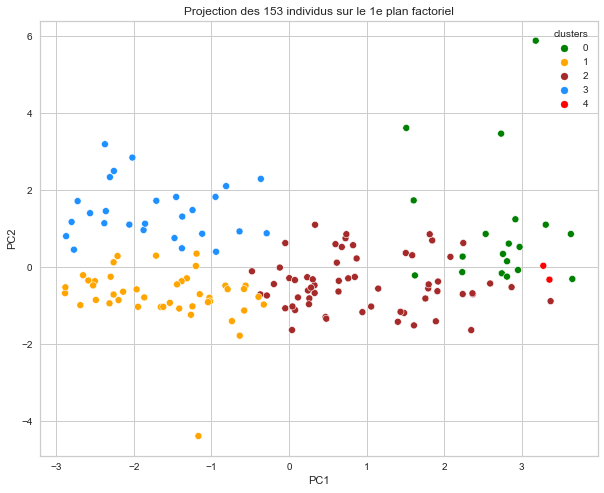

In [648]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_df_3.PC1, y=pca_df_3.PC2, hue=pca_df_3.clusters, ci=None, palette=['green','orange','brown','dodgerblue','red'], legend='full' )
plt.title("Projection des 153 individus sur le 1e plan factoriel")

#plt.scatter(kmeans_3.cluster_centers_[:, 4],kmeans_3.cluster_centers_[:, 5], s=300, c='red')
#plt.show()

# <font color = 'orange'> 7. Tests Statistiques </font>

## 7.1 Test d'adéquation

 ####  test de Kolmogorov-Smirnov(kstest)

In [649]:
pca_col_3

,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dep_import_vol,autosuff_vol
Zone,,,,,,,
Afghanistan,2044.0,55.54,20.057616,14.146796,513.085978,50.877193,49.122807
Afrique du Sud,2900.0,83.56,42.233126,7.326988,6121.876572,24.291115,78.686200
Albanie,3365.0,117.77,54.411140,-1.037630,4514.204908,60.606061,39.393939
Algérie,3320.0,91.65,29.143481,9.677150,4109.701336,0.657895,97.697368
Allemagne,3483.0,103.04,60.918090,2.039455,44552.061000,54.078356,97.238279
...,...,...,...,...,...,...,...
Émirats arabes unis,3003.0,103.73,49.686687,3.642876,40644.804043,96.875000,9.791667
Équateur,2593.0,66.28,46.529873,7.811926,6213.501276,0.000000,100.000000
États-Unis d'Amérique,3768.0,112.88,64.936215,3.396305,60116.568493,0.671948,119.715925


###### Kcal_hab

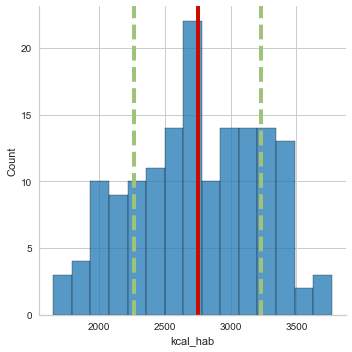

In [650]:
sns.displot( pca_col_3.kcal_hab, bins=15)

plt.axvline(x=pca_col_3.kcal_hab.mean(), color='r', linewidth=4)
plt.axvline(x=pca_col_3.kcal_hab.mean() + pca_col_3.kcal_hab.std(), color='g', linestyle='--',linewidth=4)
plt.axvline(x=pca_col_3.kcal_hab.mean() - pca_col_3.kcal_hab.std(), color='g', linestyle='--',linewidth=4)


Text(0.5, 1.0, 'distribution kcal vs distibution normal(mean et std similaires)')

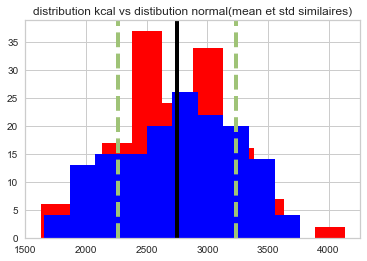

In [651]:
from scipy.stats import norm
# Normal distribution avec mean et std defini
ideal_cal = norm.rvs(size=len(pca_col_3.kcal_hab), loc=pca_col_3.kcal_hab.mean(), scale=pca_col_3.kcal_hab.std())

#sns.displot(ideal, bins=20)
plt.hist(ideal_cal, color='red')
plt.hist(pca_col_3.kcal_hab, color='blue')
plt.axvline(x=pca_col_3.kcal_hab.mean(), color='black',  linewidth=4)
plt.axvline(x=pca_col_3.kcal_hab.mean() + pca_col_3.kcal_hab.std(), color='g', linestyle='--', linewidth=4)
plt.axvline(x=pca_col_3.kcal_hab.mean() - pca_col_3.kcal_hab.std(), color='g', linestyle='--', linewidth=4)
plt.title('distribution kcal vs distibution normal(mean et std similaires)')

In [652]:
stats.kstest(pca_col_3.kcal_hab, ideal_cal)

KstestResult(statistic=0.09803921568627451, pvalue=0.4552396479641014)

On ne peut pas donc rejeter l’hypothèse de normalité, H0 ✅

###### kprot_hab

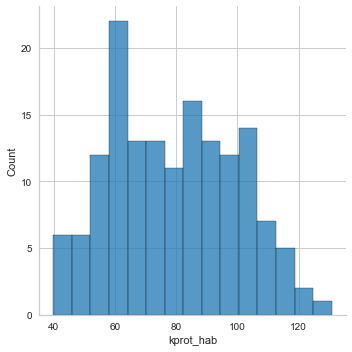

In [653]:
sns.displot( pca_col_3.kprot_hab, bins=15)

(array([ 9., 15., 29., 19., 22., 18., 18., 15.,  5.,  3.]),
 array([ 39.88,  48.97,  58.06,  67.15,  76.24,  85.33,  94.42, 103.51,
        112.6 , 121.69, 130.78]),
 <BarContainer object of 10 artists>)

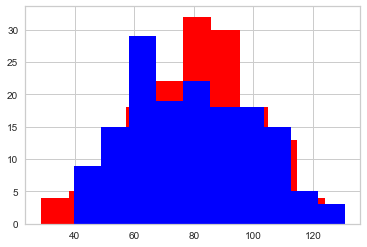

In [654]:
# Normal distribution avec mean et std defini
ideal_prot = norm.rvs(size=len(pca_col_3.kprot_hab), loc=pca_col_3.kprot_hab.mean(), scale=pca_col_3.kprot_hab.std())

#sns.displot(ideal, bins=20)
plt.hist(ideal_prot, color='red')
plt.hist(pca_col_3.kprot_hab, color='blue')

In [655]:
stats.kstest(pca_col_3.kprot_hab, ideal_prot)

KstestResult(statistic=0.13071895424836602, pvalue=0.146535217252864)

On ne peut pas donc rejeter l’hypothèse de normalité, H0 ✅

###### ratio_prot_anim

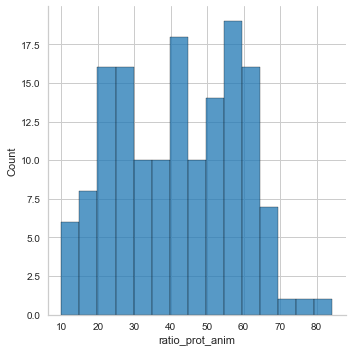

In [656]:
sns.displot( pca_col_3.ratio_prot_anim, bins=15)

(array([ 9., 21., 23., 13., 21., 21., 26., 16.,  2.,  1.]),
 array([ 9.99697976, 17.42198767, 24.84699558, 32.27200348, 39.69701139,
        47.12201929, 54.5470272 , 61.97203511, 69.39704301, 76.82205092,
        84.24705882]),
 <BarContainer object of 10 artists>)

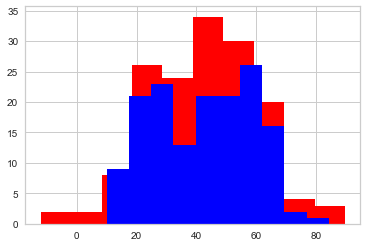

In [657]:
# Normal distribution avec mean et std defini
ideal_anim = norm.rvs(size=len(pca_col_3.ratio_prot_anim), loc=pca_col_3.ratio_prot_anim.mean(), scale=pca_col_3.ratio_prot_anim.std())

#sns.displot(ideal, bins=20)
plt.hist(ideal_anim, color='red')
plt.hist(pca_col_3.ratio_prot_anim, color='blue')

In [658]:
stats.kstest(pca_col_3.ratio_prot_anim, ideal_anim)

KstestResult(statistic=0.058823529411764705, pvalue=0.9549588575272832)

On ne peut pas donc rejeter l’hypothèse de normalité, H0 ✅

###### var_pop

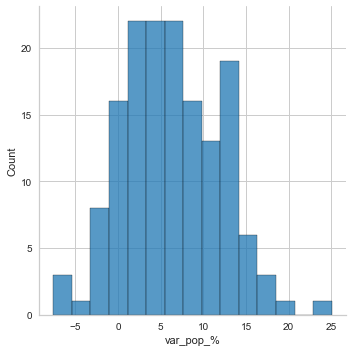

In [659]:
sns.displot( pca_col_3['var_pop_%'], bins=15)

(array([ 3.,  9., 27., 33., 32., 19., 22.,  6.,  1.,  1.]),
 array([-7.56213962, -4.30288875, -1.04363788,  2.21561299,  5.47486386,
         8.73411473, 11.99336561, 15.25261648, 18.51186735, 21.77111822,
        25.03036909]),
 <BarContainer object of 10 artists>)

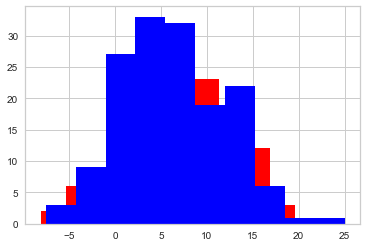

In [660]:
# Normal distribution avec mean et std defini
ideal_pop = norm.rvs(size=len(pca_col_3['var_pop_%']), loc=pca_col_3['var_pop_%'].mean(), scale=pca_col_3['var_pop_%'].std())

#sns.displot(ideal, bins=20)
plt.hist(ideal_pop, color='red')
plt.hist(pca_col_3['var_pop_%'], color='blue')

In [661]:
stats.kstest(pca_col_3['var_pop_%'], ideal_pop)

KstestResult(statistic=0.06535947712418301, pvalue=0.9009160881090946)

On ne peut pas donc rejeter l’hypothèse de normalité, H0 ✅

###### PIB_hab_usd

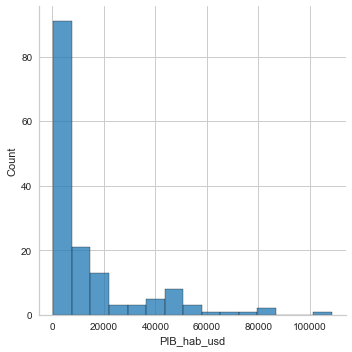

In [662]:
sns.displot( pca_col_3['PIB_hab_usd'], bins=15)

(array([107.,  18.,   6.,   5.,   8.,   4.,   2.,   2.,   0.,   1.]),
 array([   359.232443 ,  11166.5023738,  21973.7723046,  32781.0422354,
         43588.3121662,  54395.582097 ,  65202.8520278,  76010.1219586,
         86817.3918894,  97624.6618202, 108431.931751 ]),
 <BarContainer object of 10 artists>)

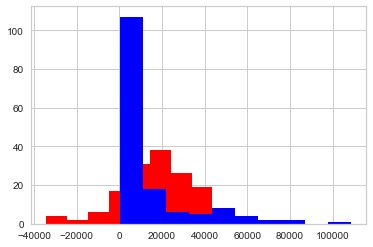

In [663]:
# Normal distribution avec mean et std defini
ideal_pib = norm.rvs(size=len(pca_col_3['PIB_hab_usd']), loc=pca_col_3['PIB_hab_usd'].mean(), scale=pca_col_3['PIB_hab_usd'].std())

#sns.displot(ideal, bins=20)
plt.hist(ideal_pib, color='red')
plt.hist(pca_col_3['PIB_hab_usd'], color='blue')

In [664]:
stats.kstest(pca_col_3['PIB_hab_usd'], ideal_pib)

KstestResult(statistic=0.35947712418300654, pvalue=3.5420546322757657e-09)

On peut donc rejeter l’hypothèse de normalité, H1✅

###### dep_import_vol	

le taux de dépendance aux importations, défini en économie comme le rapport entre les importations et la disponibilité intérieure du pays

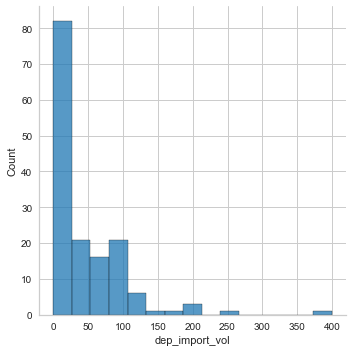

In [665]:
sns.displot( pca_col_3['dep_import_vol'], bins=15)

(array([93., 26., 26.,  2.,  1.,  3.,  1.,  0.,  0.,  1.]),
 array([  0.        ,  39.95594714,  79.91189427, 119.86784141,
        159.82378855, 199.77973568, 239.73568282, 279.69162996,
        319.64757709, 359.60352423, 399.55947137]),
 <BarContainer object of 10 artists>)

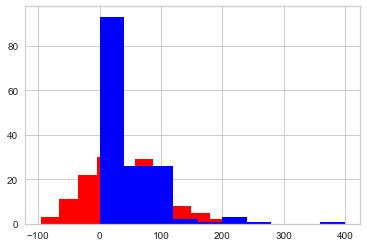

In [666]:
# Normal distribution avec mean et std defini
ideal_import = norm.rvs(size=len(pca_col_3['dep_import_vol']), loc=pca_col_3['dep_import_vol'].mean(), scale=pca_col_3['dep_import_vol'].std())

#sns.displot(ideal, bins=20)
plt.hist(ideal_import, color='red')
plt.hist(pca_col_3['dep_import_vol'], color='blue')

In [667]:
stats.kstest(pca_col_3['dep_import_vol'], ideal_import)

KstestResult(statistic=0.24183006535947713, pvalue=0.00024510554985220773)

On peut donc rejeter l’hypothèse de normalité, H1✅

###### autosuff_vol

 le taux d'autosuffisance exprime l'importance de la production, par rapport à la disponibilité intérieure du pays

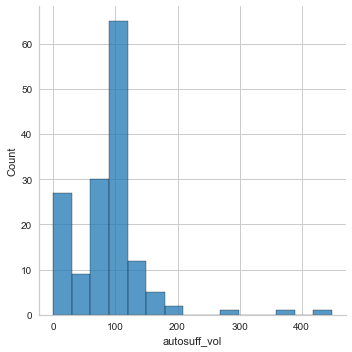

In [668]:
sns.displot( pca_col_3['autosuff_vol'], bins=15)

(array([33., 33., 71., 11.,  2.,  0.,  1.,  0.,  1.,  1.]),
 array([  0.        ,  44.82758621,  89.65517241, 134.48275862,
        179.31034483, 224.13793103, 268.96551724, 313.79310345,
        358.62068966, 403.44827586, 448.27586207]),
 <BarContainer object of 10 artists>)

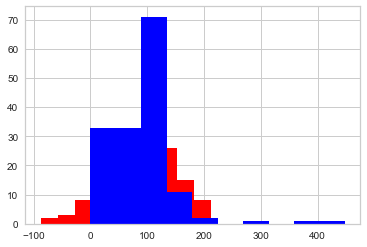

In [669]:
# Normal distribution avec mean et std defini
ideal_product = norm.rvs(size=len(pca_col_3['autosuff_vol']), loc=pca_col_3['autosuff_vol'].mean(), scale=pca_col_3['autosuff_vol'].std())

#sns.displot(ideal, bins=20)
plt.hist(ideal_product, color='red')
plt.hist(pca_col_3['autosuff_vol'], color='blue')

In [670]:
stats.kstest(pca_col_3['autosuff_vol'], ideal_product)

KstestResult(statistic=0.20261437908496732, pvalue=0.003658570258035831)

On peut donc rejeter l’hypothèse de normalité, H1✅

## 7.2 Corrélation entre les variables

Text(0.5, 1.0, 'Matric de corrélation entre variables')

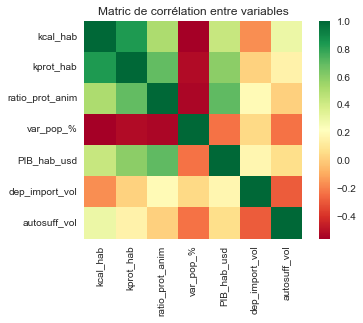

In [671]:
sns.heatmap(X_km_3.drop('clusters',axis=1).corr(), square=True ,cmap="RdYlGn" ) #"Blues"
plt.title('Matric de corrélation entre variables')

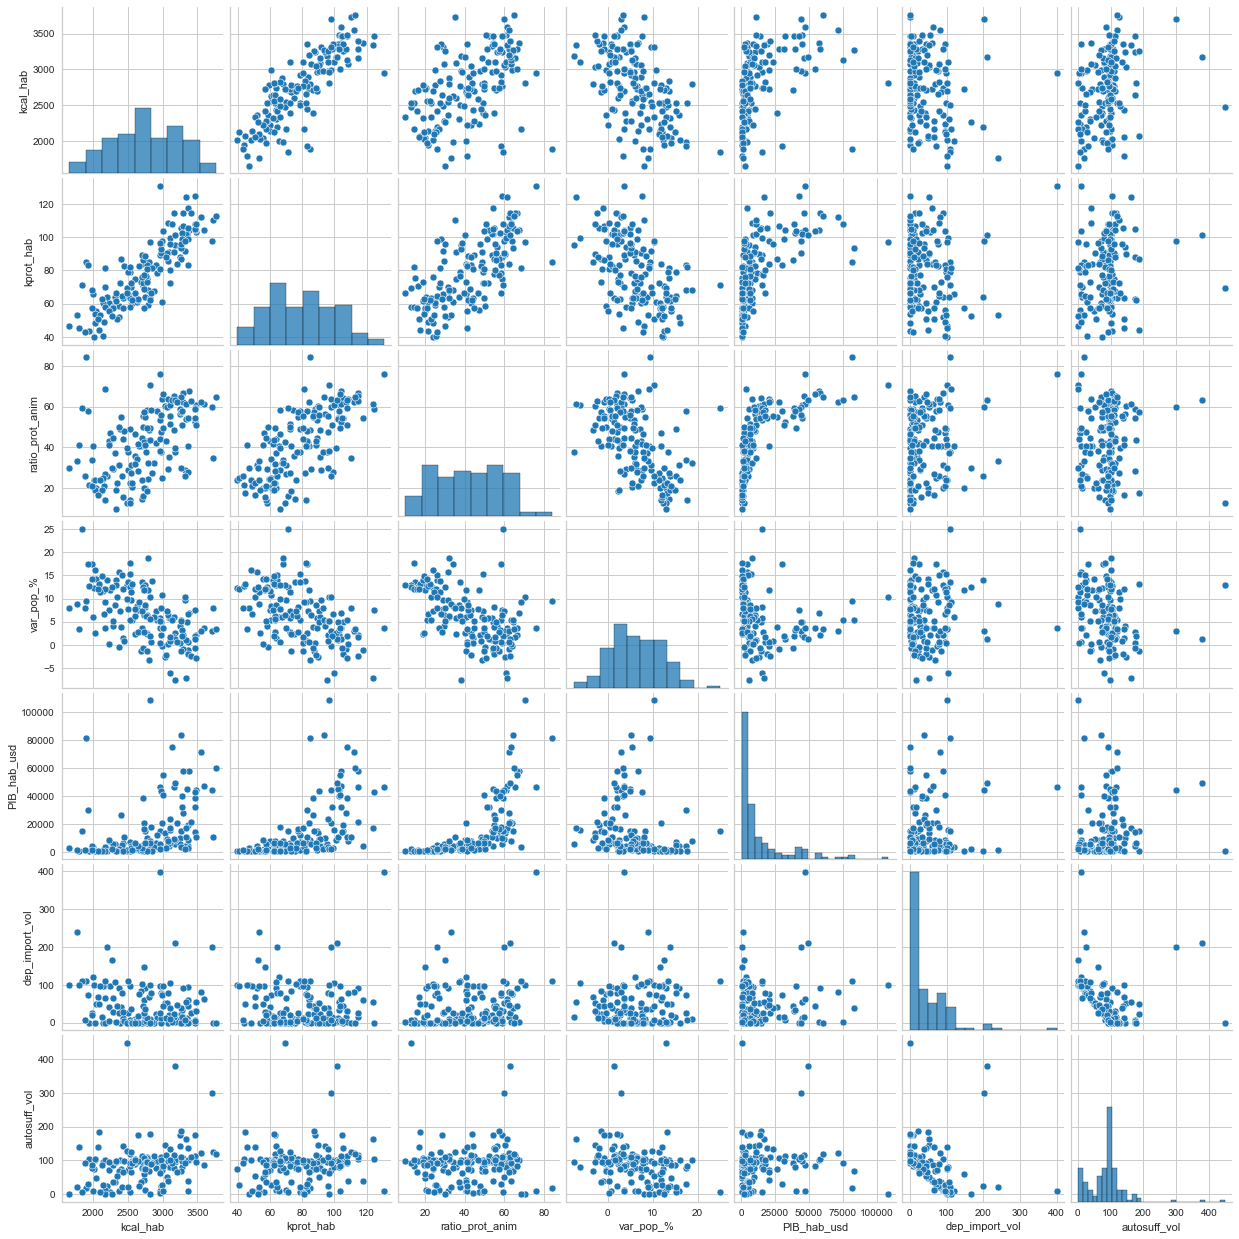

In [672]:
sns.pairplot(X_km_3.drop('clusters',axis=1))

## 7.3  Test de comparaison de deux populations (dans le cas gaussien)

#### T test(entre 2 clusters)

In [673]:
X_km_3_scaled

,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dep_import_vol,autosuff_vol,clusters
0,-1.453854,-1.174368,-1.345737,1.383628,-0.673568,0.128355,-0.666406,3
1,0.313277,0.207556,0.008243,0.174914,-0.386054,-0.347992,-0.166190,2
2,1.273225,1.894767,0.751802,-1.307595,-0.468465,0.302669,-0.831019,2
3,1.180327,0.606549,-0.790977,0.591447,-0.489201,-0.771432,0.155482,2
4,1.516825,1.168295,1.149099,-0.762226,1.583929,0.185711,0.147714,0
...,...,...,...,...,...,...,...,...
148,0.525911,1.202325,0.463339,-0.478042,1.383638,0.952505,-1.331894,0
149,-0.320496,-0.644679,0.270592,0.260863,-0.381357,-0.783219,0.194443,1
150,2.105181,1.653596,1.394436,-0.521743,2.381787,-0.771180,0.528039,0
151,-0.859305,-0.647639,-1.960013,1.153881,-0.662871,-0.758334,0.170942,1


##### kcal_hab

<AxesSubplot:xlabel='clusters', ylabel='kcal_hab'>

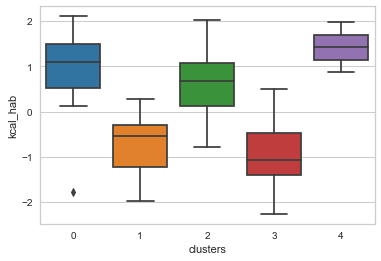

In [674]:
sns.boxplot(y = 'kcal_hab', x='clusters', data=X_km_3_scaled)

In [675]:
df_cluster_1 = X_km_3_scaled[X_km_3_scaled['clusters'] == 0]
df_cluster_2 = X_km_3_scaled[X_km_3_scaled['clusters'] == 1]
df_cluster_3 = X_km_3_scaled[X_km_3_scaled['clusters'] == 2]
df_cluster_4 = X_km_3_scaled[X_km_3_scaled['clusters'] == 3]
df_cluster_5 = X_km_3_scaled[X_km_3_scaled['clusters'] == 4]

In [676]:
var_pop_0 = df_cluster_1['kcal_hab']
var_pop_1 = df_cluster_2['kcal_hab']
var_pop_2 = df_cluster_3['kcal_hab']
var_pop_3 = df_cluster_4['kcal_hab']
var_pop_4 = df_cluster_5['kcal_hab']

In [677]:
stats.ttest_ind(var_pop_0, var_pop_1)

Ttest_indResult(statistic=8.885230348373856, pvalue=1.3405153341462648e-12)

On peut  donc rejeter l’hypothèse d'egalité, H1 ✅

In [678]:
stats.ttest_ind(var_pop_0, var_pop_4)

Ttest_indResult(statistic=-0.7833196954102774, pvalue=0.44309472897320046)

On peut  donc rejeter l’hypothèse d'egalité, H1 ✅

In [679]:
stats.ttest_ind(var_pop_3, var_pop_4)

Ttest_indResult(statistic=-4.722919555031079, pvalue=6.413725269193946e-05)

On ne peut pas donc rejeter l’hypothèse d'egalité, H1 ❌

##### proportion protein total animal

<AxesSubplot:xlabel='clusters', ylabel='ratio_prot_anim'>

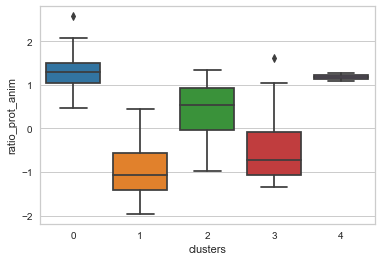

In [680]:
sns.boxplot(y = 'ratio_prot_anim', x='clusters', data=X_km_3_scaled)

In [681]:
anim_1 = df_cluster_1['ratio_prot_anim']
anim_2 = df_cluster_2['ratio_prot_anim']
anim_3 = df_cluster_3['ratio_prot_anim']
anim_4 = df_cluster_4['ratio_prot_anim']
anim_5 = df_cluster_5['ratio_prot_anim']

In [682]:
stats.ttest_ind(anim_1, anim_2)

Ttest_indResult(statistic=13.775974873363841, pvalue=2.1882027057015917e-20)

On peut donc rejeter l’hypothèse d'egalité, H1 ✅

In [683]:
stats.ttest_ind(anim_1, anim_5)

Ttest_indResult(statistic=0.3805655133269396, pvalue=0.7077470853263299)

On peut donc rejeter l’hypothèse d'egalité, H1 ✅

In [684]:
stats.ttest_ind(anim_4, anim_5)

Ttest_indResult(statistic=-2.8569604182581747, pvalue=0.008133980681886572)

On peut donc rejeter l’hypothèse d'egalité, H1 ✅

#### ANOVA (entre 5 clusters)

##### var_pop_%

<AxesSubplot:xlabel='clusters', ylabel='var_pop_%'>

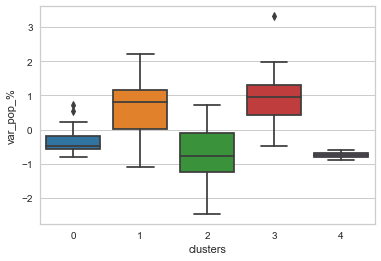

In [685]:
sns.boxplot(y = 'var_pop_%', x='clusters', data=X_km_3_scaled)

In [686]:
pop_1 = df_cluster_1['var_pop_%']
pop_2 = df_cluster_2['var_pop_%']
pop_3 = df_cluster_3['var_pop_%']
pop_4 = df_cluster_4['var_pop_%']
pop_5 = df_cluster_5['var_pop_%']

In [687]:
fvalue, pvalue = stats.f_oneway(pop_1, pop_2, pop_3, pop_4, pop_5)
print("p_value = ", pvalue)

p_value =  2.2546824323682108e-20


On peut donc rejeter l’hypothèse d'egalité, H1✅

##### kcal_hab

<AxesSubplot:xlabel='clusters', ylabel='kcal_hab'>

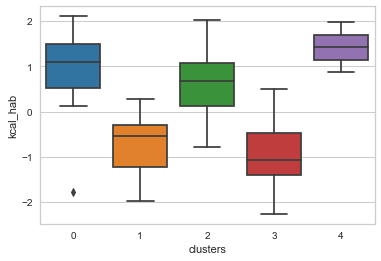

In [688]:
sns.boxplot(y = 'kcal_hab', x='clusters', data=X_km_3_scaled)

In [689]:
kcal_1 = df_cluster_1['kcal_hab']
kcal_2 = df_cluster_2['kcal_hab']
kcal_3 = df_cluster_3['kcal_hab']
kcal_4 = df_cluster_4['kcal_hab']
kcal_5 = df_cluster_5['kcal_hab']

In [690]:
fvalue, pvalue = stats.f_oneway(kcal_1, kcal_2, kcal_3, kcal_4, kcal_5)
print("p_value = ", pvalue)

p_value =  6.97057440064595e-28


On peut donc rejeter l’hypothèse d'egalité, H1✅

# <font color = 'orange'> 8. pays ciblés </font>



##  8.1  Analyse qcut 


In [691]:
df.columns

Index(['Zone', 'kcal_hab', 'kprot_hab', 'ratio_prot_anim', 'pop_2017',
       'var_pop_%', 'PIB_hab_usd', 'dispo_int_vol', 'Importations_vol',
       'Production_vol', 'dep_import_vol', 'autosuff_vol'],
      dtype='object')

In [692]:
total_anim_labels = range(1,6)
tal_anim_group = pd.qcut(df['ratio_prot_anim'], q=5, labels =total_anim_labels)

pib_labels = range(1,6)
pib_group = pd.qcut(df['PIB_hab_usd'], q=5, labels =pib_labels)

dep_label = range(1,6)
dep_group = pd.qcut(df['dep_import_vol'], q=5, labels =dep_label)

auto_label = range(5,0,-1)
auto_group = pd.qcut(df['autosuff_vol'], q=5, labels =auto_label)

In [693]:
df_cible = df[['Zone','ratio_prot_anim','PIB_hab_usd','dep_import_vol', 'autosuff_vol']].copy()
df_cible['tal_anim_group'] = tal_anim_group.values
df_cible['pib_group'] = pib_group.values
df_cible['dep_group'] = dep_group.values
df_cible['auto_group'] = auto_group.values
df_cible

,Zone,ratio_prot_anim,PIB_hab_usd,dep_import_vol,autosuff_vol,tal_anim_group,pib_group,dep_group,auto_group
0,Afghanistan,20.057616,513.085978,50.877193,49.122807,1,1,4,4
1,Afrique du Sud,42.233126,6121.876572,24.291115,78.686200,3,3,3,4
2,Albanie,54.411140,4514.204908,60.606061,39.393939,4,3,4,5
3,Algérie,29.143481,4109.701336,0.657895,97.697368,2,3,1,3
4,Allemagne,60.918090,44552.061000,54.078356,97.238279,5,5,4,3
...,...,...,...,...,...,...,...,...,...
148,Émirats arabes unis,49.686687,40644.804043,96.875000,9.791667,4,5,5,5
149,Équateur,46.529873,6213.501276,0.000000,100.000000,3,3,1,2
150,États-Unis d'Amérique,64.936215,60116.568493,0.671948,119.715925,5,5,1,1
151,Éthiopie,9.996980,721.753494,1.388889,98.611111,1,1,2,2


In [694]:
df_cible.columns

Index(['Zone', 'ratio_prot_anim', 'PIB_hab_usd', 'dep_import_vol',
       'autosuff_vol', 'tal_anim_group', 'pib_group', 'dep_group',
       'auto_group'],
      dtype='object')

In [695]:
Y = df_cible[[ 'tal_anim_group','pib_group', 'dep_group', 'auto_group']]

In [696]:
kmeans_y = KMeans(n_clusters=5, init='k-means++', max_iter = 300)
kmeans_y.fit(Y)

KMeans(n_clusters=5)

In [697]:
kmeans_y.labels_

array([1, 1, 2, 0, 2, 1, 2, 4, 1, 4, 2, 1, 3, 4, 0, 0, 2, 4, 2, 3, 4, 1,
       1, 1, 3, 4, 2, 2, 2, 0, 2, 0, 1, 4, 4, 2, 3, 2, 1, 0, 4, 2, 0, 0,
       4, 4, 0, 2, 1, 1, 4, 1, 1, 1, 0, 1, 1, 3, 4, 3, 3, 0, 1, 4, 4, 4,
       2, 2, 1, 2, 3, 1, 2, 1, 2, 0, 1, 4, 2, 1, 3, 4, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 3, 1, 3, 3, 3, 4, 4, 3, 2, 3, 0, 0, 4, 0, 4, 0, 4, 4, 0,
       2, 2, 3, 3, 4, 1, 0, 1, 3, 3, 0, 1, 2, 4, 3, 0, 2, 1, 2, 3, 1, 3,
       2, 0, 1, 1, 2, 3, 1, 0, 0, 4, 0, 1, 3, 3, 3, 3, 2, 0, 4, 3, 1])

In [698]:
df_cible['kmeans_clusters'] = kmeans_y.labels_

In [699]:
df_cible

,Zone,ratio_prot_anim,PIB_hab_usd,dep_import_vol,autosuff_vol,tal_anim_group,pib_group,dep_group,auto_group,kmeans_clusters
0,Afghanistan,20.057616,513.085978,50.877193,49.122807,1,1,4,4,1
1,Afrique du Sud,42.233126,6121.876572,24.291115,78.686200,3,3,3,4,1
2,Albanie,54.411140,4514.204908,60.606061,39.393939,4,3,4,5,2
3,Algérie,29.143481,4109.701336,0.657895,97.697368,2,3,1,3,0
4,Allemagne,60.918090,44552.061000,54.078356,97.238279,5,5,4,3,2
...,...,...,...,...,...,...,...,...,...,...
148,Émirats arabes unis,49.686687,40644.804043,96.875000,9.791667,4,5,5,5,2
149,Équateur,46.529873,6213.501276,0.000000,100.000000,3,3,1,2,0
150,États-Unis d'Amérique,64.936215,60116.568493,0.671948,119.715925,5,5,1,1,4
151,Éthiopie,9.996980,721.753494,1.388889,98.611111,1,1,2,2,3


In [700]:
#nombre de de pays dans chaque cluster
df_cible.groupby('kmeans_clusters')['kmeans_clusters'].count()

kmeans_clusters
0    26
1    35
2    32
3    32
4    28
Name: kmeans_clusters, dtype: int64

In [701]:
df_cible_g = df_cible.groupby('kmeans_clusters')['ratio_prot_anim', 'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol'].mean()
df_cible_g

C:\Users\pouri\AppData\Local\Temp/ipykernel_58920/1215691161.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cible_g = df_cible.groupby('kmeans_clusters')['ratio_prot_anim', 'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol'].mean()


,ratio_prot_anim,PIB_hab_usd,dep_import_vol,autosuff_vol
kmeans_clusters,,,,
0,40.798602,5917.393620,6.717476,107.835852
1,32.268162,2641.642334,83.630591,38.047012
2,58.133703,28837.260090,74.932735,56.969520
3,23.016583,1449.924182,9.551716,116.148976
4,59.073332,31193.008323,31.532808,138.092346


<AxesSubplot:xlabel='kmeans_clusters', ylabel='dep_import_vol'>

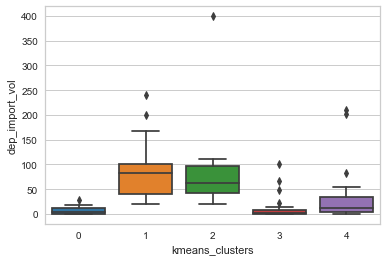

In [702]:
sns.boxplot(y = 'dep_import_vol', x='kmeans_clusters', data=df_cible)

<AxesSubplot:xlabel='kmeans_clusters', ylabel='autosuff_vol'>

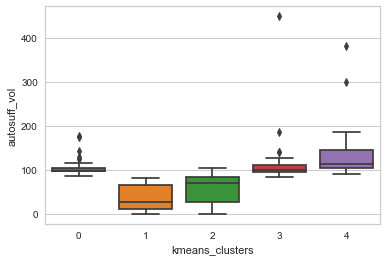

In [703]:
sns.boxplot(y = 'autosuff_vol', x='kmeans_clusters', data=df_cible)

<AxesSubplot:xlabel='kmeans_clusters', ylabel='ratio_prot_anim'>

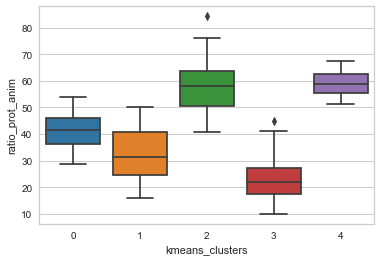

In [704]:
sns.boxplot(y = 'ratio_prot_anim', x='kmeans_clusters', data=df_cible)

<AxesSubplot:xlabel='kmeans_clusters', ylabel='PIB_hab_usd'>

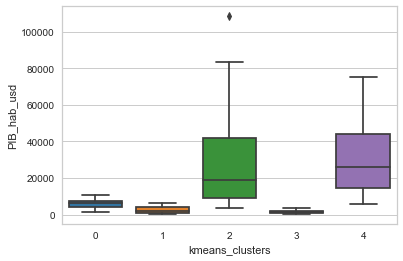

In [705]:
sns.boxplot(y = 'PIB_hab_usd', x='kmeans_clusters', data=df_cible)

In [706]:
df_cible[df_cible['kmeans_clusters'] == 1 ]

,Zone,ratio_prot_anim,PIB_hab_usd,dep_import_vol,autosuff_vol,tal_anim_group,pib_group,dep_group,auto_group,kmeans_clusters
0,Afghanistan,20.057616,513.085978,50.877193,49.122807,1,1,4,4,1
1,Afrique du Sud,42.233126,6121.876572,24.291115,78.686200,3,3,3,4,1
5,Angola,31.443995,4095.811686,91.118421,8.881579,2,3,5,5,1
8,Arménie,47.505468,3914.525246,77.777778,24.444444,3,3,4,5,1
11,Azerbaïdjan,35.567520,4150.868844,20.930233,80.620155,2,3,3,4,1
21,Bénin,20.331043,1136.593360,91.129032,11.290323,1,1,5,5,1
22,Cabo Verde,40.586092,3292.638357,120.000000,10.000000,3,2,5,5,1
23,Cambodge,29.177397,1385.260419,27.027027,72.972973,2,1,3,4,1
32,Congo,47.140320,2154.629048,97.196262,6.542056,3,2,5,5,1
38,Djibouti,30.117396,2930.696963,100.000000,0.000000,2,2,5,5,1


##  8.2  Analyse par KMeans 


In [707]:
X_km_3

,Zone,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dep_import_vol,autosuff_vol,clusters
0,Afghanistan,2044.0,55.54,20.057616,14.146796,513.085978,50.877193,49.122807,3
1,Afrique du Sud,2900.0,83.56,42.233126,7.326988,6121.876572,24.291115,78.686200,2
2,Albanie,3365.0,117.77,54.411140,-1.037630,4514.204908,60.606061,39.393939,2
3,Algérie,3320.0,91.65,29.143481,9.677150,4109.701336,0.657895,97.697368,2
4,Allemagne,3483.0,103.04,60.918090,2.039455,44552.061000,54.078356,97.238279,0
...,...,...,...,...,...,...,...,...,...
148,Émirats arabes unis,3003.0,103.73,49.686687,3.642876,40644.804043,96.875000,9.791667,0
149,Équateur,2593.0,66.28,46.529873,7.811926,6213.501276,0.000000,100.000000,1
150,États-Unis d'Amérique,3768.0,112.88,64.936215,3.396305,60116.568493,0.671948,119.715925,0
151,Éthiopie,2332.0,66.22,9.996980,12.850516,721.753494,1.388889,98.611111,1


In [708]:
X_km_3_scaled

,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dep_import_vol,autosuff_vol,clusters
0,-1.453854,-1.174368,-1.345737,1.383628,-0.673568,0.128355,-0.666406,3
1,0.313277,0.207556,0.008243,0.174914,-0.386054,-0.347992,-0.166190,2
2,1.273225,1.894767,0.751802,-1.307595,-0.468465,0.302669,-0.831019,2
3,1.180327,0.606549,-0.790977,0.591447,-0.489201,-0.771432,0.155482,2
4,1.516825,1.168295,1.149099,-0.762226,1.583929,0.185711,0.147714,0
...,...,...,...,...,...,...,...,...
148,0.525911,1.202325,0.463339,-0.478042,1.383638,0.952505,-1.331894,0
149,-0.320496,-0.644679,0.270592,0.260863,-0.381357,-0.783219,0.194443,1
150,2.105181,1.653596,1.394436,-0.521743,2.381787,-0.771180,0.528039,0
151,-0.859305,-0.647639,-1.960013,1.153881,-0.662871,-0.758334,0.170942,1


Text(0.5, 1.0, 'kcal_hab VS clusters')

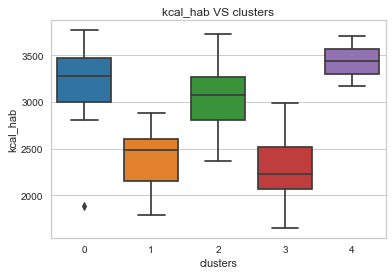

In [709]:
sns.boxplot(y = 'kcal_hab', x='clusters', data=X_km_3)
plt.title('kcal_hab VS clusters')

Text(0.5, 1.0, 'kprot_hab VS clusters')

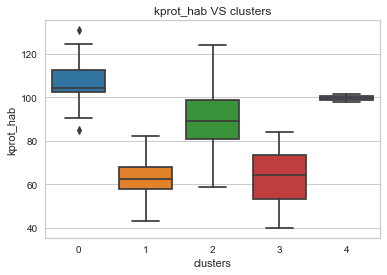

In [710]:
sns.boxplot(y = 'kprot_hab', x='clusters', data=X_km_3)
plt.title('kprot_hab VS clusters')

Text(0.5, 1.0, 'ratio_prot_anim VS clusters')

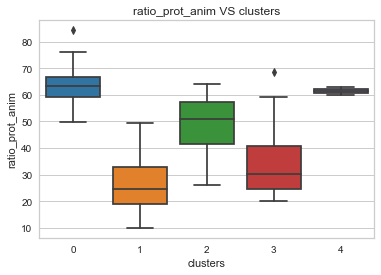

In [711]:
sns.boxplot(y = 'ratio_prot_anim', x='clusters', data=X_km_3)
plt.title('ratio_prot_anim VS clusters')

Text(0.5, 1.0, 'var_pop_% VS clusters')

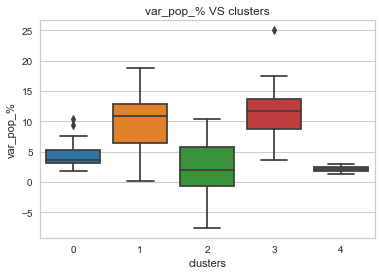

In [712]:
sns.boxplot(y = 'var_pop_%', x='clusters', data=X_km_3)
plt.title('var_pop_% VS clusters')

Text(0.5, 1.0, 'PIB_hab_usd VS clusters')

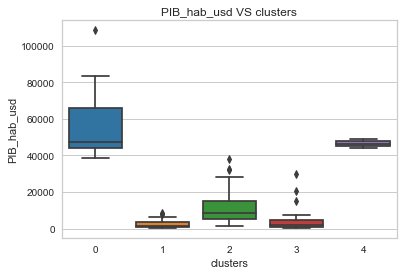

In [713]:
sns.boxplot(y = 'PIB_hab_usd', x='clusters', data=X_km_3)
plt.title('PIB_hab_usd VS clusters')

Text(0.5, 1.0, 'dep_import_vol VS clusters')

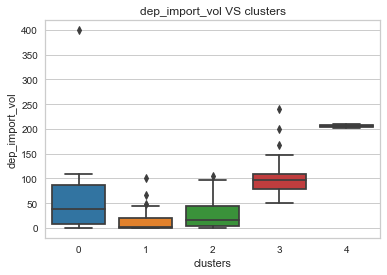

In [714]:
sns.boxplot(y = 'dep_import_vol', x='clusters', data=X_km_3)
plt.title('dep_import_vol VS clusters')

Text(0.5, 1.0, 'autosuff_vol VS clusters')

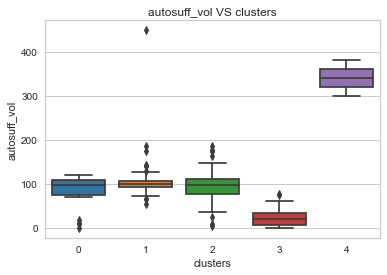

In [715]:
sns.boxplot(y = 'autosuff_vol', x='clusters', data=X_km_3)
plt.title('autosuff_vol VS clusters')

In [719]:
df_cible_km_1 = X_km_3[X_km_3['clusters'] == 0 ]
df_cible_km_2 = X_km_3[X_km_3['clusters'] == 4 ]
df_cible_km = pd.concat([df_cible_km_1, df_cible_km_2])
df_cible_km

,Zone,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dep_import_vol,autosuff_vol,clusters
4,Allemagne,3483.0,103.04,60.918090,2.039455,44552.061000,54.078356,97.238279,0
9,Australie,3373.0,104.35,67.570676,6.836274,57628.863849,1.285141,102.088353,0
10,Autriche,3598.0,104.05,61.460836,3.601786,47306.411842,63.953488,86.046512,0
25,Canada,3356.0,102.15,54.263338,4.927748,44906.748920,12.718379,99.091544,0
27,Chine - RAS de Hong-Kong,2957.0,130.78,76.166080,3.551363,46705.027813,399.559471,10.572687,0
28,Chine - RAS de Macao,1886.0,85.00,84.247059,9.403696,81516.664768,109.523810,19.047619,0
37,Danemark,3286.0,114.82,66.504093,2.117327,57938.797728,91.095890,104.109589,0
44,Finlande,3166.0,114.46,65.315394,1.752758,46310.120883,14.414414,116.216216,0
45,France,3468.0,108.06,59.439200,1.971373,38720.645922,32.373640,111.964171,0
63,Irlande,3556.0,112.26,62.248352,3.052230,71391.006104,81.818182,120.661157,0


In [720]:
df_cible_km.shape

(21, 9)

In [721]:
df_cible_km.columns

Index(['Zone', 'kcal_hab', 'kprot_hab', 'ratio_prot_anim', 'var_pop_%',
       'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol', 'clusters'],
      dtype='object')

In [722]:
df_final = df_cible_km[['kcal_hab', 'kprot_hab', 'ratio_prot_anim',  'var_pop_%',
       'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol']]

# Centrage et Réduction
df_final_scale = preprocessing.StandardScaler().fit(df_final)
df_final_scaled = df_final_scale.transform(df_final)

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


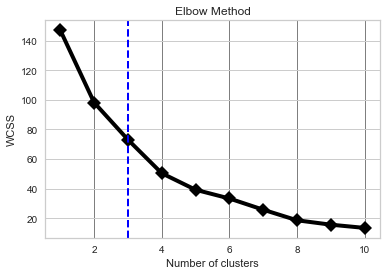

In [723]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_final_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, linewidth=4, color='black', marker= 'D', markersize=10)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(which='both', color='black', axis='x', alpha=0.5)

plt.axvline(x=3, linewidth=2, color='blue', linestyle='--')
plt.show()

In [724]:
# Clustering par K-means
kmeans_final_3 = KMeans(n_clusters=3, init='k-means++', max_iter = 200).fit(df_final_scaled)
kmeans_final_3_labels = kmeans_final_3.labels_

In [725]:
silhouette_score_final = silhouette_score(df_final_scaled,kmeans_final_3_labels )
print(f'Silhouette Score(n=4): {silhouette_score(df_final_scaled, kmeans_final_3_labels)}')

Silhouette Score(n=4): 0.4543165959262031


In [726]:
kmeans_per_k_final_3 = [KMeans(n_clusters=k, random_state=42).fit(df_final_scaled) for k in range(1, 10)]

silhouette_score_final_3 = [silhouette_score(df_final_scaled, model.labels_) for model in kmeans_per_k_final_3[1:]]

silhouette_score_final_3

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.48215282216959376,
 0.3989309187826632,
 0.4102535565956451,
 0.22287928361206483,
 0.1924181810639776,
 0.2056212605081027,
 0.22278670095028424,
 0.18375469735697425]

C:\Users\pouri\AppData\Local\Temp/ipykernel_58920/2809791493.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  _ = plt.plot(range(2, 10), silhouette_score_final_3, "bo-", color='blue', linewidth=3, markersize=8, label='silhouette curve')


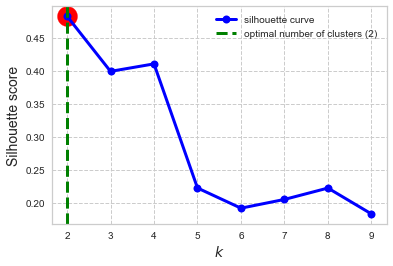

In [727]:
#rcParams['figur.figsize'] = 16, 5
_ = plt.plot(range(2, 10), silhouette_score_final_3, "bo-", color='blue', linewidth=3, markersize=8, label='silhouette curve')
_ = plt.xlabel("$k$", fontsize = 14, family='Arial')
_ = plt.ylabel("Silhouette score", fontsize = 14, family='Arial')
_ = plt.grid(which='major', color='#cccccc', linestyle='--')

#calculer le nombre optimal de clesters
k = np.argmax(silhouette_score_final_3) + 2 


#ligne vertical sur cluster optimal
_ = plt.axvline(x=k, linestyle='--', c= 'green', linewidth=3,
              label = 'optimal number of clusters ({})'.format(k))

_ =plt.scatter(k, silhouette_score_final_3[k -2], c='red', s=400)
_ = plt.legend(shadow=True)
_= plt.show()

In [728]:
df_cible_2 = df_cible_km[['Zone', 'kcal_hab', 'kprot_hab', 'ratio_prot_anim', 'var_pop_%',
       'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol']]

df_cible_2['KMeans_c2'] = kmeans_final_3_labels
#df_cible_2.set_index('Zone', inplace=True)
df_cible_2.head()


,Zone,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dep_import_vol,autosuff_vol,KMeans_c2
4,Allemagne,3483.0,103.04,60.918090,2.039455,44552.061000,54.078356,97.238279,0
9,Australie,3373.0,104.35,67.570676,6.836274,57628.863849,1.285141,102.088353,0
10,Autriche,3598.0,104.05,61.460836,3.601786,47306.411842,63.953488,86.046512,0
25,Canada,3356.0,102.15,54.263338,4.927748,44906.748920,12.718379,99.091544,0
27,Chine - RAS de Hong-Kong,2957.0,130.78,76.166080,3.551363,46705.027813,399.559471,10.572687,2


In [729]:
df_cible_2.shape

(21, 9)

In [730]:
#sns.boxplot(y = 'kcal_hab', x='KMeans_c2', data=df_cible_2)

In [731]:
#sns.boxplot(y = 'kprot_hab', x='KMeans_c2', data=df_cible_2)

In [732]:
#sns.boxplot(y = 'ratio_prot_anim', x='KMeans_c2', data=df_cible_2)

In [733]:
#sns.boxplot(y = 'var_pop_%', x='KMeans_c2', data=df_cible_2)

In [734]:
#sns.boxplot(y = 'PIB_hab_usd', x='KMeans_c2', data=df_cible_2)

In [735]:
#sns.boxplot(y = 'dep_import_vol', x='KMeans_c2', data=df_cible_2)

In [736]:
#sns.boxplot(y = 'autosuff_vol', x='KMeans_c2', data=df_cible_2)

In [737]:
kmeans_final_3.cluster_centers_

array([[ 0.2868068 ,  0.01978256, -0.30883144, -0.23818846, -0.21393263,
        -0.22696308,  0.18664733],
       [-2.2396711 , -1.39854579,  1.90730174,  2.30775832,  2.19130839,
         0.31056986, -1.12397602],
       [-0.68318025,  2.44100554,  1.74436249, -0.32812427, -0.53182937,
         3.46419571, -1.11169987]])

In [738]:
#Xp3 = X_km_3_scaled[['PIB_hab_usd', 'dep_import_vol' ]].values
df_cible_2.columns

Index(['Zone', 'kcal_hab', 'kprot_hab', 'ratio_prot_anim', 'var_pop_%',
       'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol', 'KMeans_c2'],
      dtype='object')

In [739]:
# Centrage et Réduction
df_cible_2_scale = preprocessing.StandardScaler().fit(df_cible_2[['kcal_hab', 'kprot_hab', 'ratio_prot_anim', 'var_pop_%',
                                                                  'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol']])
                                                      
df_cible_2_scaled = df_cible_2_scale.transform(df_cible_2[['kcal_hab', 'kprot_hab', 'ratio_prot_anim',  'var_pop_%',
                                                            'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol']])

In [740]:

df_cible_2_scaled = pd.DataFrame(df_cible_2_scaled, columns=['kcal_hab', 'kprot_hab', 'ratio_prot_anim', 'var_pop_%',
                                                            'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol'])

df_cible_2_scaled.head()

,kcal_hab,kprot_hab,ratio_prot_anim,var_pop_%,PIB_hab_usd,dep_import_vol,autosuff_vol
0,0.660075,-0.230740,-0.353790,-0.959918,-0.653290,-0.231622,-0.097359
1,0.379166,-0.104569,0.561618,1.044570,0.084445,-0.796383,-0.040593
2,0.953753,-0.133463,-0.279108,-0.307053,-0.497902,-0.125982,-0.228348
3,0.335753,-0.316460,-1.269497,0.247037,-0.633280,-0.674075,-0.075668
4,-0.683180,2.441006,1.744362,-0.328124,-0.531829,3.464196,-1.111700


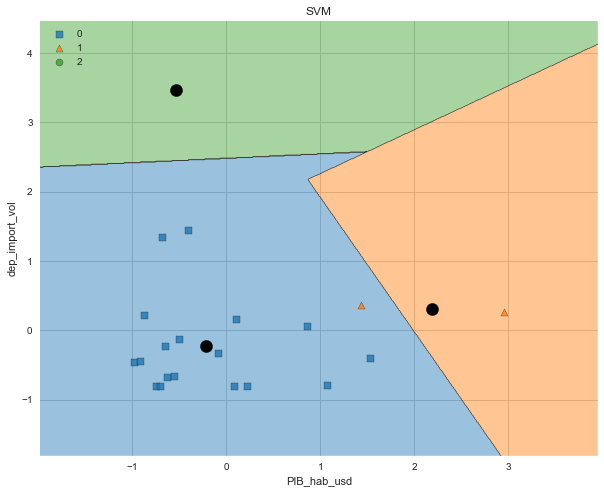

In [741]:
# Récupération des clusters attribués à chaque individu
plt.figure(figsize=(10,8))
#sns.scatterplot(x='kcal_hab', y ='kprot_hab', data=X_km_2, hue='clusters',ci=None, palette=["C0", "C1", "k","C3","C4"])


Xp_3 = df_cible_2_scaled[['PIB_hab_usd', 'dep_import_vol' ]].values
yp_3 = df_cible_2.KMeans_c2.values

# Training a classifier
svm_33 = SVC(C=0.5, kernel='linear')
svm_33.fit(Xp_3, yp_3)


# Plotting decision regions
plot_decision_regions(Xp_3, yp_3, clf=svm_33, legend=2)

# Adding axes annotations
plt.xlabel('PIB_hab_usd')
plt.ylabel('dep_import_vol')
plt.title('SVM')


plt.scatter(kmeans_final_3.cluster_centers_[:, 4],kmeans_final_3.cluster_centers_[:, 5], s=150, c='black')
plt.show()

In [742]:
# choix du nombre de composantes à calculer
n_comp_3 = 7

# selection des colonnes à prendre en compte dans l'ACP
df_final_pca = df_cible_2[['kcal_hab', 'kprot_hab', 'ratio_prot_anim', 'var_pop_%',
       'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol']]

In [743]:
X_final = df_final_pca.values

features_final = df_cible_2[['kcal_hab', 'kprot_hab', 'ratio_prot_anim', 'var_pop_%',
       'PIB_hab_usd', 'dep_import_vol', 'autosuff_vol']].columns

In [744]:
# Centrage et Réduction
std_scale_final = preprocessing.StandardScaler().fit(X_final)
scaled_data_final = std_scale_final.transform(X_final)

[0.42613245 0.21265301 0.1519947  0.09460198 0.04973713 0.04347651
 0.02140423]
[0.42613245 0.63878546 0.79078016 0.88538214 0.93511926 0.97859577
 1.        ]


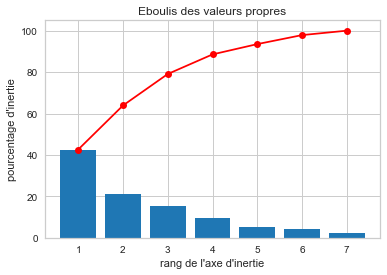

In [745]:
# Calcul des composantes principales
pca_final = decomposition.PCA(n_components=n_comp_3)
pca_final.fit(scaled_data_final)

print(pca_final.explained_variance_ratio_)
print(pca_final.explained_variance_ratio_.cumsum())

# Eboulis des valeurs propres
display_scree_plot(pca_final)

In [746]:
pcs_final = pca_3.components_

In [747]:
per_var_final = np.round(pca_final.explained_variance_ratio_*100, decimals=1)
labels_final = ['PC' + str(x) for x in range(1, len(per_var_final)+1)]

pca_data_final = pca_final.transform(scaled_data_final)

pca_df_final = pd.DataFrame(pca_data_final, index = df_cible_2.Zone, columns = labels_final )
pca_df_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Zone,,,,,,,
Allemagne,-1.139550,-0.281266,-0.006063,0.307906,0.398033,-0.476569,0.409135
Australie,0.611862,-0.652962,-0.290212,-0.608493,0.090192,0.774776,0.583622
Autriche,-0.838449,-0.319749,-0.260097,-0.026033,-0.047125,-0.276723,0.680588
Canada,-0.775888,-1.252396,-0.180895,0.474181,-0.536225,0.176173,-0.005545
Chine - RAS de Hong-Kong,0.520623,4.478833,-1.413350,0.647610,-0.507285,-0.180601,0.239104


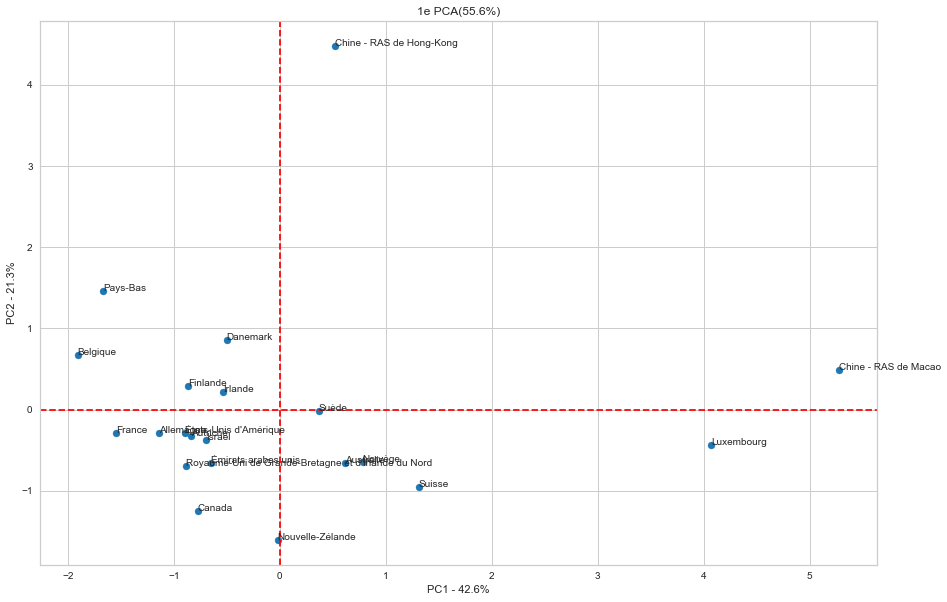

In [748]:
plt.figure(figsize=(15,10))
plt.scatter(pca_df_final.PC1, pca_df_final.PC2)
plt.title('1e PCA(55.6%)')
plt.xlabel('PC1 - {0}%'.format(per_var_final[0]))
plt.ylabel('PC2 - {0}%'.format(per_var_final[1]))

for sample in pca_df_final.index:
    plt.annotate(sample, (pca_df_final.PC1.loc[sample],  pca_df_final.PC2.loc[sample]) )
    
plt.axvline(x = 0, linestyle='--', color='red') 
plt.axhline(y = 0, linestyle='--', color='red')    

plt.show() 

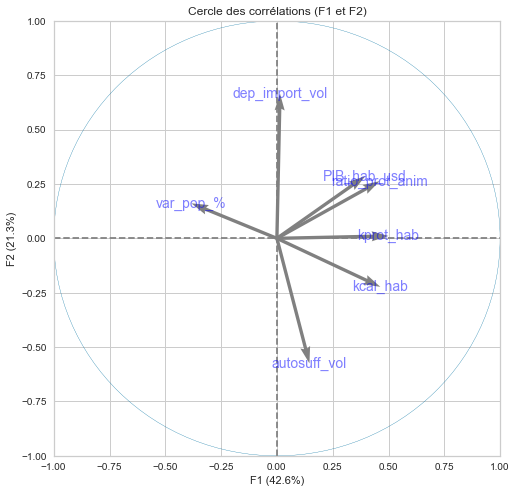

In [749]:
display_circles(pcs_final, 7, pca_final, [(0,1)], labels = np.array(features_final))

In [750]:
pca_df_final['clusters'] = kmeans_final_3_labels
pca_df_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,clusters
Zone,,,,,,,,
Allemagne,-1.139550,-0.281266,-0.006063,0.307906,0.398033,-0.476569,0.409135,0
Australie,0.611862,-0.652962,-0.290212,-0.608493,0.090192,0.774776,0.583622,0
Autriche,-0.838449,-0.319749,-0.260097,-0.026033,-0.047125,-0.276723,0.680588,0
Canada,-0.775888,-1.252396,-0.180895,0.474181,-0.536225,0.176173,-0.005545,0
Chine - RAS de Hong-Kong,0.520623,4.478833,-1.413350,0.647610,-0.507285,-0.180601,0.239104,2


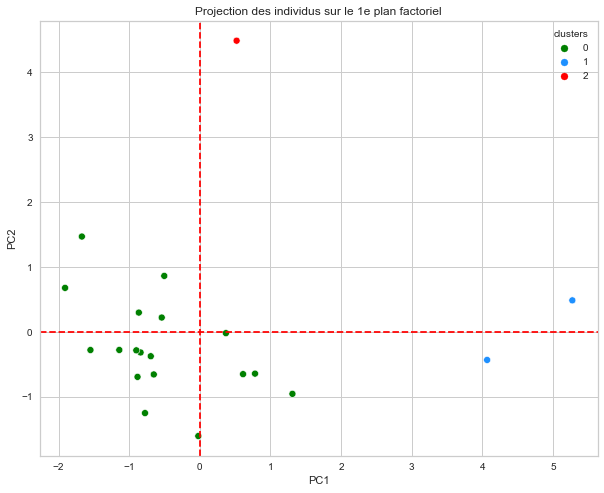

In [751]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_df_final.PC1, y=pca_df_final.PC2, hue=pca_df_final.clusters, ci=None,  palette=['green','dodgerblue','red'], legend='full' )
plt.title("Projection des individus sur le 1e plan factoriel")

plt.axvline(x = 0, linestyle='--', color='red') 
plt.axhline(y = 0, linestyle='--', color='red')

In [752]:
pca_df_final[pca_df_final['clusters'] == 0 ]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,clusters
Zone,,,,,,,,
Allemagne,-1.139550,-0.281266,-0.006063,0.307906,0.398033,-0.476569,0.409135,0
Australie,0.611862,-0.652962,-0.290212,-0.608493,0.090192,0.774776,0.583622,0
Autriche,-0.838449,-0.319749,-0.260097,-0.026033,-0.047125,-0.276723,0.680588,0
Canada,-0.775888,-1.252396,-0.180895,0.474181,-0.536225,0.176173,-0.005545,0
Danemark,-0.503178,0.858593,-0.446999,-0.309389,0.671899,-0.304793,-0.284866,0
Finlande,-0.863298,0.294233,-0.471852,0.180275,1.196828,0.226086,-0.434814,0
France,-1.547971,-0.282102,-0.272694,0.373113,0.454404,-0.085396,0.142761,0
Irlande,-0.539087,0.217951,-0.332059,-1.122087,0.003858,-0.653364,-0.328564,0
Israël,-0.694264,-0.377496,-1.761567,-0.487522,-0.749621,1.658791,-0.241194,0


In [753]:
pca_df_final[pca_df_final['clusters'] == 2 ]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,clusters
Zone,,,,,,,,
Chine - RAS de Hong-Kong,0.520623,4.478833,-1.41335,0.64761,-0.507285,-0.180601,0.239104,2


In [754]:
pca_df_final[pca_df_final['clusters'] == 1 ]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,clusters
Zone,,,,,,,,
Chine - RAS de Macao,5.272096,0.482351,1.212406,1.009001,0.693159,0.605016,0.211735,1
Luxembourg,4.065931,-0.434900,-0.183252,-1.110078,-1.010081,-0.470788,-0.205759,1


In [756]:
#pca_df_final[pca_df_final['clusters'] == 3 ]